# Simulations & Experiments for IXO's Pilot Project with Chimple Learning 

[Chimple Learning](http://www.chimple.org/) is a non-profit educational organization dedicated to improving children's learning experience fun yet effective through gamification. The [IXO Foundation](https://ixo.world/) has partnered with Chimple to fund educational projects using the [alpha-bond](https://www.alphabond.org/) mechanism. 

We have modified the generic alpha-bond mechanism to include a **Continuous Funding** capability and a **Secondary Market** for selling supply tokens. 


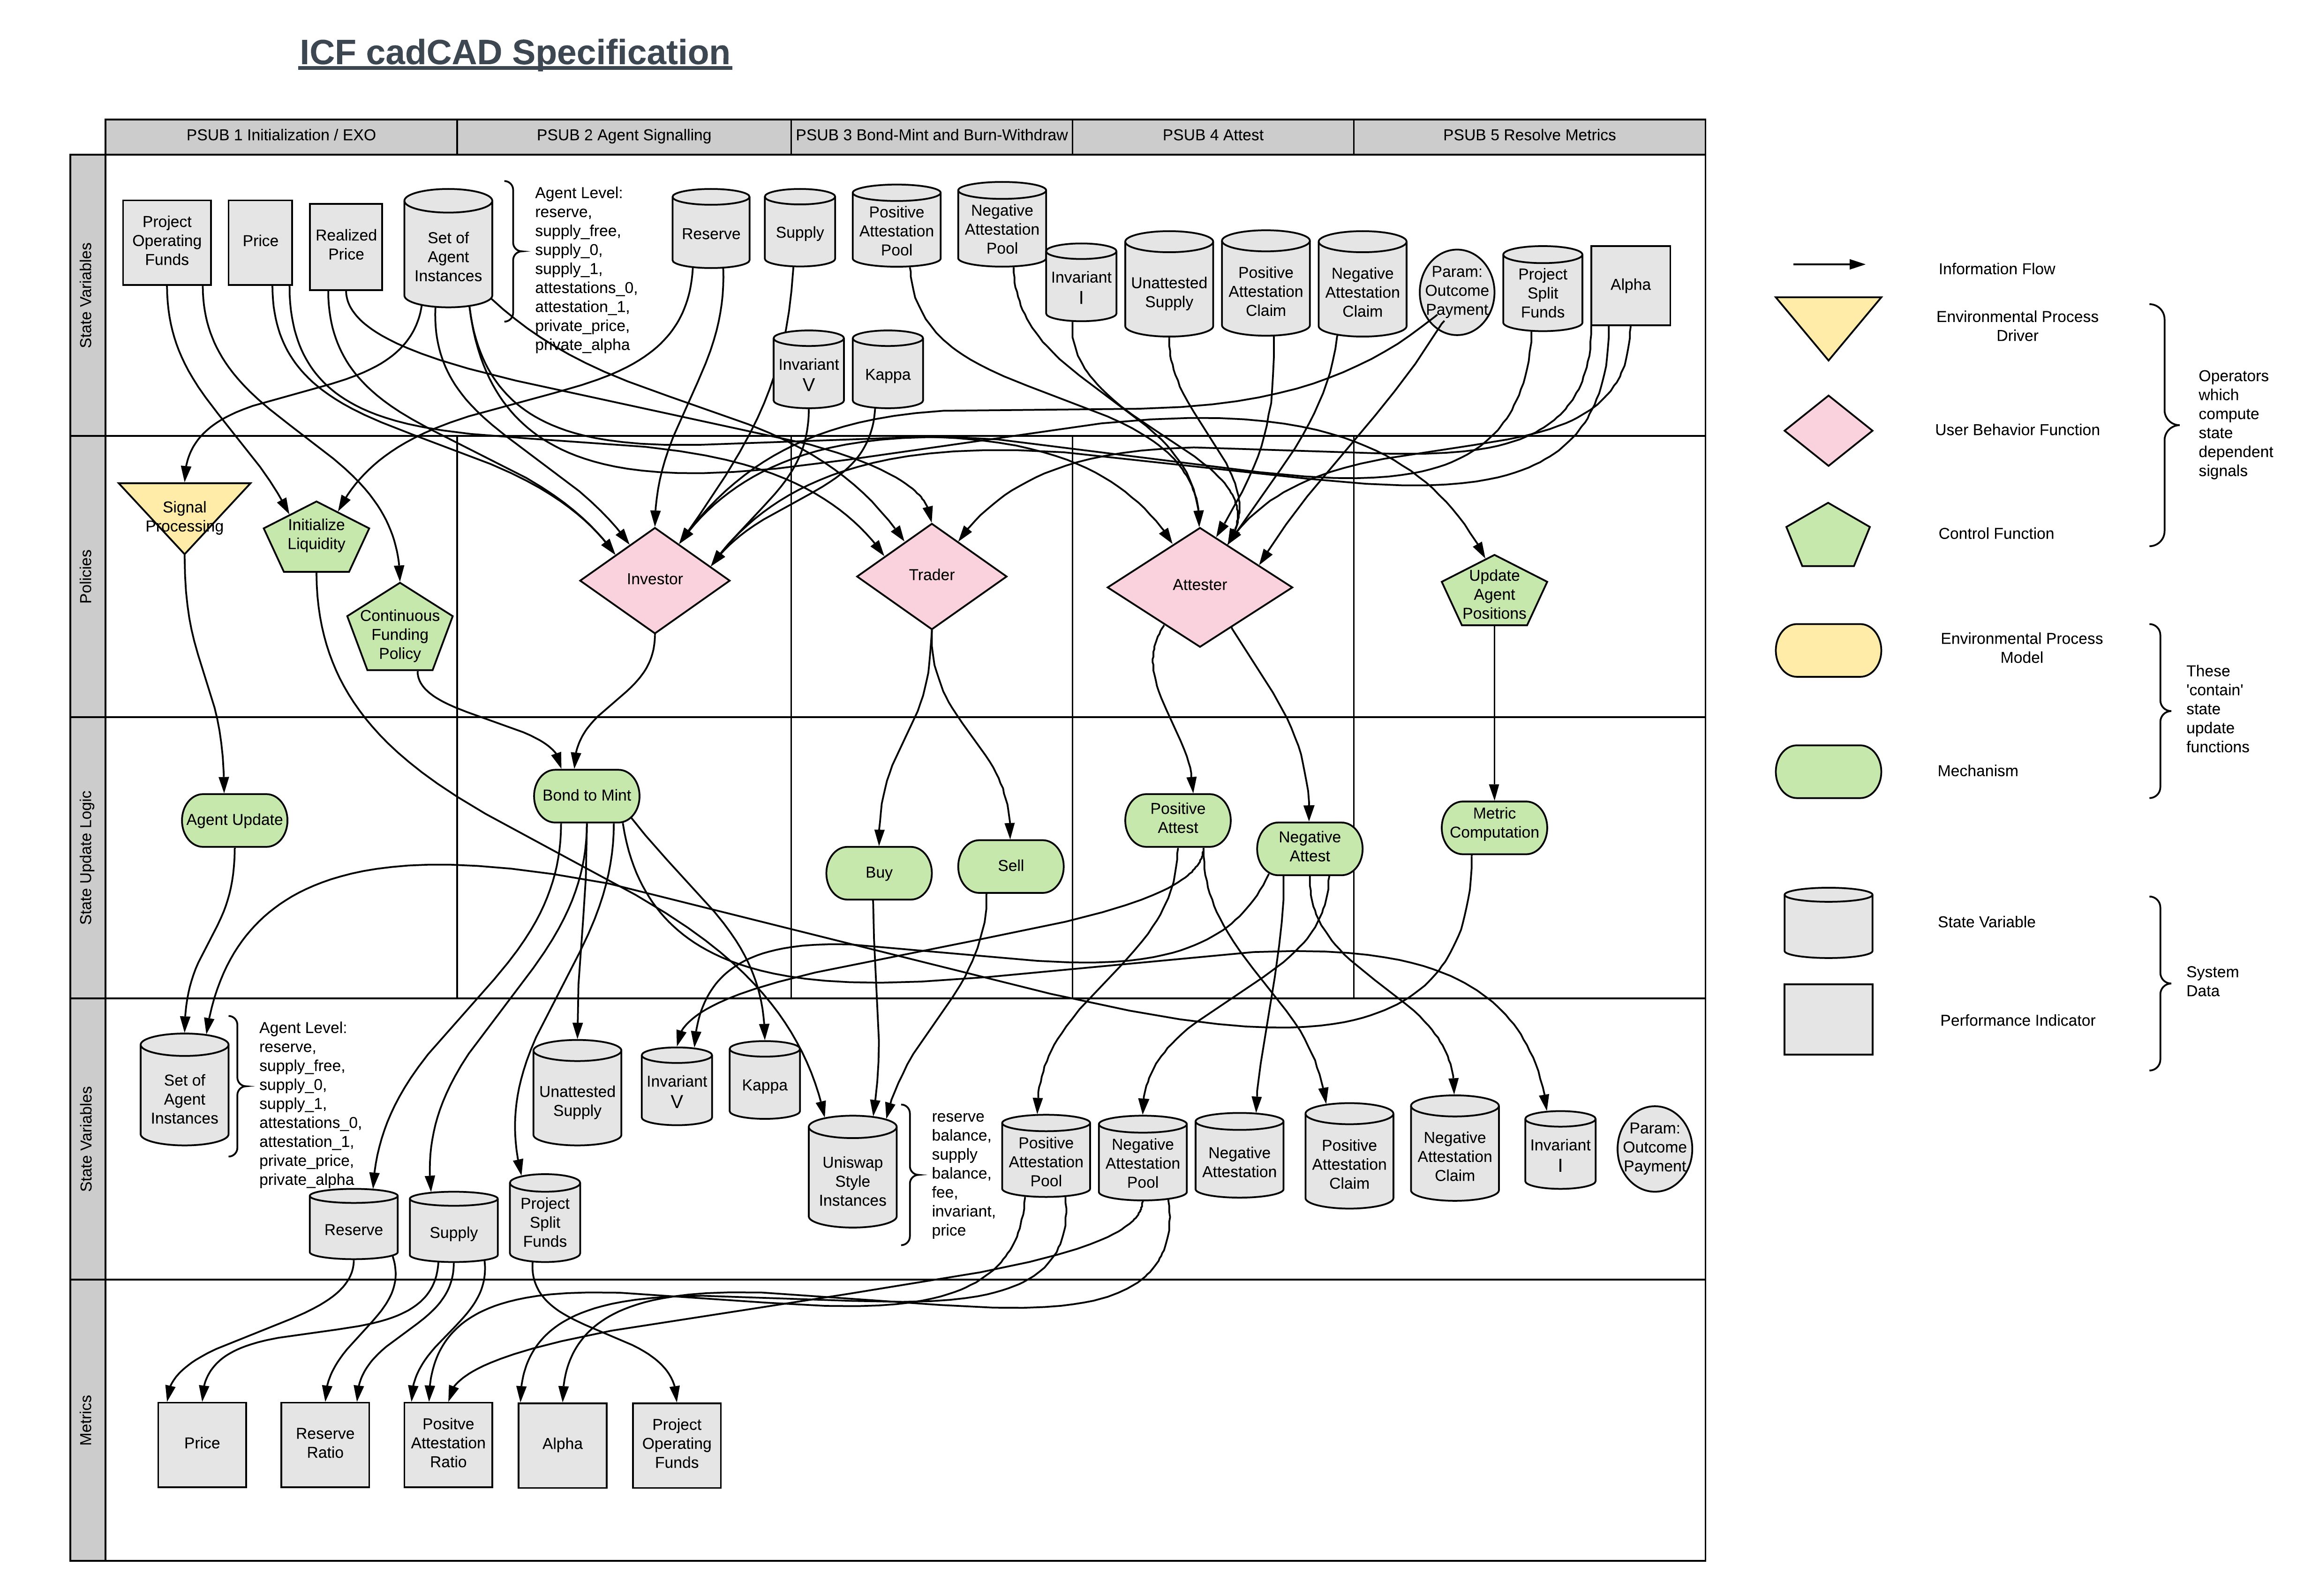

In [4]:
# For displaying image files
from IPython.display import Image
Image("images/Phase_3_continuous.png")

## Setup

Continuous funding is enabled, such that 100% of initial funds raised are allocated to project operating funds. <br/>
- ENABLE_CONTINUOUS = [True] <br/>
- THETA = [0.9] 

Burning tokens on the bonding curve is not allowed. Participants in the bonding curve will only be able to bond to acquire supply tokens. They will not be able to burn or sell their supply tokens on the primary market, i.e the bonding curve. They can, however, sell their supply tokens on a **secondary market**. <br/>

- Initial capital raised through a Community Mutual Savings mechanism = $66,000

- A hatch instalment will be made by a Impact Investor, amounting to = $30,000 <br/>

- This amount will be locked up in the Attest Negative token pool, as $S_0$ tokens. <br/>

- The Impact Investor disburses monthly payments in the 12 months, amount to = $3000 per month


**This makes the total initial investment = $66,000.** <br/>

**The total outcome payment is a 10% premium over the initial investment = $72,000**


## Experiment 1: Agent Payouts
#### Empirically demonstrate that agents' payouts while participating in both bonding curve *and* prediction market is greater, on an average, than their payouts while participating in a pure bonding curve

### Hypothesis 
Agents are able to avail themselves to a significantly larger earning potential by participating in the prediction market (attestation) mechanism. 

### Experiment setup
We test two cases - 
- Test Case A: Where agents are able to participate in only a pure bonding curve
- Test Case B: Where agents are able to participate in both the bonding curve as well as the prediction market. 

This is a controlled experiment where all factors and parameters are maintained to be the same across both test cases, except for the agents' ability to participate in the prediction market.


### Test Case A: Agents can only participate in a pure bonding curve

We disable agents from being able to aprticipate in the attestation mechanism by modifying the conditions to unacheivable and domain-exceeding amounts: 

if alpha > private_alpha+1 and s_free > 0: <br>
       attest_negative
        
elif alpha+1 < private_alpha and s_free > 0: <br>
       attest_positive

- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing

#### Result

In [9]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

In [8]:
experiments = run.run()

config_ids =  [{'M': {'starting_kappa': 2, 'starting_alpha': 0.03536977491961415, 'money_raised': 66000, 'monthly_instalment': 3000, 'C': 72000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 1200, 'rules_price': 'martin', 'E': 0.2, 'ENABLE_CONTINUOUS': True, 'THETA': 0.9, 'ENABLE_BURN': False, 'fee_numerator': 997, 'fee_denominator': 1000}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}]


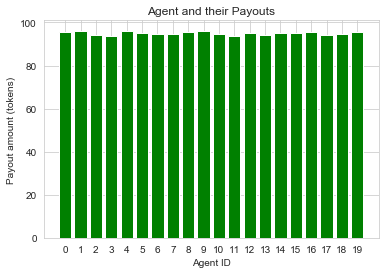

In [13]:
t = 600 # t is the last timestep

import matplotlib.pyplot as plt

S_free = experiments.dataset[0].supply_free[t]
S_0 = experiments.dataset[0].supply_0[t]
S_1 = experiments.dataset[0].supply_1[t]

agents_id = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
payout_list = []

for a in agents_id:
    #print(a)
    q1 = experiments.dataset[0].agents[t].agent_attestations_1[a]
    q0 = experiments.dataset[0].agents[t].agent_attestations_0[a]
    
    s_free = experiments.dataset[0].agents[t].agent_supply_free[a]
    s1 = experiments.dataset[0].agents[t].agent_supply_1[a]
    s0 = experiments.dataset[0].agents[t].agent_supply_0[a]
    s = s_free + s1 + s0
    
    agent_private_alpha = experiments.dataset[0].agents[t].agent_private_alpha[a]

    Q0 = experiments.dataset[0].attestations_0[t]
    Q1 = 1 #experiments.dataset[0].attestations_1[t]

    R = experiments.dataset[0].reserve[t]
    S = experiments.dataset[0].supply[t]

    C = 72000 # experiments.C
    alpha = experiments.dataset[0].alpha[t]
    
    # At the time of settlement, if alpha < 0.5, we consider it to be 0. If alpha > 0.5, we consider it to be 1. 
    # Thus Settlement Conditions apply
    if alpha < 0.5:
        alpha = 0
    elif alpha > 0.5:
        alpha = 1
    
    #print("s_free = ", s_free, "| S = ", S)
    T1 = (s_free/S)*(C*alpha + R)
    T2 = (s1/(S-S_0))*alpha*(C+R)
    T3 = (s0/(S-S_1))*(1-alpha)*(R)
    #print("T1 = ", T1, "| T2 = ", T2, "| T3 = ", T3)

    agent_payout = T1+T2+T3
    payout_list.append(agent_payout)
    #print(a, "'s Payout = ", agent_payout, "| Private Alpha = ", agent_private_alpha)

#plt.plot(payout_list)

arr2d = np.array(payout_list)

arr1d = arr2d.flatten()

x = agents_id
payouts = arr1d

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, payouts, color='green')
plt.xlabel("Agent ID")
plt.ylabel("Payout amount (tokens)")
plt.title("Agent and their Payouts")

plt.xticks(x_pos, x)

plt.show()

### Test Case B: Agents can participate in a bonding curve *and* prediction market

Agents are allowed to participate in the attestation mechanism by under the following conditions:

if alpha > private_alpha and s_free > 0: <br>
       attest_negative
        
elif alpha < private_alpha and s_free > 0: <br>
       attest_positive

- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing

#### Result

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


ALPHA =  0.03536977491961415
KAPPA =  1.0385852090032155
Initial Conditions (config.py) :  {'reserve': 66000, 'pbar': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 132000.0, 'alpha': 0.03536977491961415, 'alpha_bar': 0.03536977491961415, 'supply_0': 30000, 'supply_1': 100, 'supply_free': 101900.0, 'attestations': 30000, 'attestations_0': 30000, 'attestations_1': 100, 'invariant_V': 264000.0, 'invariant_I': 68546.62379421222, 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0    0                     0                     0            100   
1    1                     0                     0            100   
2    2                     0                     0            100   
3    3                     0                     0            100   
4    4                     0                     0            100   
5    5                     0                     0            100   
6    6                     0                     0          

Agent burns. Amt to burn =  7.858034144737757e-11
Positive attestation. | alpha =  0.0700172483727815 private_alpha =  0.535
amt_pos =  3.664241467710563e-11
amt_Q1 =  0.0
PRICE (ATTEST):  0.5374828931641695
Positive attestation 1
S =  132192.56424043674
KAPPA  =  1.0763708814247526
R =  66009.9999999
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
2  2.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
2    3.664241e-11             0.0       5.066908e-11                0.535   

   agent_private_price  agent_private_alpha_signal  \
2                0.535                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
2                         0.0                        0.0   

   agent_public_price_signal  
2                        0.0   Time  7
---------END OF TIMESTEP 7 -----------
      id  agent_attestations_1  agent_at

CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
16  16.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
16             0.0             0.0                0.0                  0.5   

    agent_private_price  agent_private_alpha_signal  \
16                  0.5                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
16                         0.0                        0.0   

    agent_public_price_signal  
16                        0.0   Time  13
agent['agent_private_price'] =  0.5700000000000001
agent['agent_private_alpha'] =  0.5700000000000001
r 100.0
Agent bonds. Amt to bond =  99.99999899999999
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 0.5660934528323286
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.12246510910451769 p

--------------TIMESTEP 20 --------------
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
2  2.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
2    3.664241e-11             0.0       5.066908e-11                0.535   

   agent_private_price  agent_private_alpha_signal  \
2                0.535                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
2                         0.0                        0.0   

   agent_public_price_signal  
2                        0.0   Time  20
agent['agent_private_price'] =  0.605
agent['agent_private_alpha'] =  0.605
r 100.0
Agent burns. Amt to burn =  4.560216856776424e-11
Positive attestation. | alpha =  0.19931828244794092 private_alpha =  0.605
amt_pos =  2.2405895715464173e-11
amt_Q1 =  0.0
PRICE pbar (from bondburn update) = 0.6382115449945277
r 100.0000000000291
Agent burns. Am

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037697                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      100.367484             0.0          62.296506                 0.63   

    agent_private_price  agent_private_alpha_signal  \
15                 0.63                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
15                         0.0                        0.0   

    agent_public_price_signal  
15                        0.0   Time  26
---------END OF TIMESTEP 26 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037697                   0.0   1.000000e-14   
16  16.0              0.027273                   0.0   1.000000e-06   
17  17.0              0.000000                   0.0   1.000000e+02   
18  18.0              0.025032               

19                        0.0   Time  31
agent['agent_private_price'] =  0.6599999999999999
agent['agent_private_alpha'] =  0.6599999999999999
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.3029415718599439 private_alpha =  0.6599999999999999
amt_pos =  36.93580874234874
amt_Q1 =  0.013833296959852194
PRICE pbar (from bondburn update) = 0.6573384558537977
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.3029415718599439 private_alpha =  0.6599999999999999
amt_pos =  35.75806976337298
amt_Q1 =  0.013392236451208683
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.3029415718599439 private_alpha =  0.6599999999999999
amt_pos =  39.64826263477539
amt_Q1 =  0.014849097264878201
PRICE (ATTEST):  0.6612240846388234
Positive attestation 1
S =  134026.41309596505
KAPPA  =  1.3403129509640432
R =  66119.9999993

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037697                   0.0   1.000000e-14   
16  16.0              0.027273                   0.0   1.000000e-06   
17  17.0              0.000000                   0.0   1.000000e+02   
18  18.0              0.025032                   0.0   6.492343e+01   
19  19.0              0.041426                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      100.367484             0.0       6.229651e+01                0.630   
16       72.237206             0.0       1.044121e+02                0.570   
17        0.000000             0.0      -8.731149e-11                0.515   
18       66.438283             0.0       6.823367e-07                0.620   
19      110.323345             0.0       5.513955e+01                0.660   

    agent_private_price  agent_private_alpha_signal  \
15                0.630                         0

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
16  16.0              0.041822                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
16      111.205121             0.0          65.444157                0.705   

    agent_private_price  agent_private_alpha_signal  \
16                0.705                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
16                         0.0                        0.0   

    agent_public_price_signal  
16                        0.0   Time  41
---------END OF TIMESTEP 41 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037697                   0.0   1.000000e-14   
16  16.0              0.041822                   0.0   1.000000e-14   
17  17.0              0.000000                   0.0   1.000000e+02   
18  18.0              0.025032               

CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037697                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      100.367484             0.0          62.296506                 0.63   

    agent_private_price  agent_private_alpha_signal  \
15                 0.63                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
15                         0.0                        0.0   

    agent_public_price_signal  
15                        0.0   Time  44
agent['agent_private_price'] =  0.725
agent['agent_private_alpha'] =  0.725
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.38435653554156546 private_alpha =  0.725
amt_pos =  23.243000731484248
amt_Q1 =  0.008682636805450504
PRICE pbar (from bondburn update) = -0.000343597388766381
r 1.000000031374395e-22
Agent 

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
13  13.0              0.036312                   0.0   1.000000e-22   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
13       97.226656             0.0          51.012131                0.745   

    agent_private_price  agent_private_alpha_signal  \
13                0.745                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
13                         0.0                        0.0   

    agent_public_price_signal  
13                        0.0   Time  49
---------END OF TIMESTEP 49 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.044497                   0.0   1.000000e-22   
16  16.0              0.041822                   0.0   1.000000e-14   
17  17.0              0.000000                   0.0   1.000000e+02   
18  18.0              0.025032               

CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
9  9.0              0.045788                   0.0   1.000000e-22   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
9       122.39438             0.0          32.049465                 0.69   

   agent_private_price  agent_private_alpha_signal  \
9                 0.69                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
9                         0.0                        0.0   

   agent_public_price_signal  
9                        0.0   Time  54
agent['agent_private_price'] =  0.7749999999999999
agent['agent_private_alpha'] =  0.7749999999999999
r 1.000000031374395e-22
Agent bonds. Amt to bond =  1.0000000213743946e-22
Positive attestation. | alpha =  0.4245460575377494 private_alpha =  0.7749999999999999
amt_pos =  11.102327948835384
amt_Q1 =  0.004143272760126387
PRICE pbar (from bondburn update) = -3.4359739102418605e-12
r 1

10                        0.0   Time  59
agent['agent_private_price'] =  0.7999999999999999
agent['agent_private_alpha'] =  0.7999999999999999
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.4420439858123215 private_alpha =  0.7999999999999999
amt_pos =  19.06188495752167
amt_Q1 =  0.007109956046305499
PRICE pbar (from bondburn update) = -0.000343597388766381
r 1.000000031374395e-22
Agent bonds. Amt to bond =  1.0000000213743946e-22
Positive attestation. | alpha =  0.4420439858123215 private_alpha =  0.7999999999999999
amt_pos =  18.041856712207192
amt_Q1 =  0.0067295050151885425
r 1.000000031374395e-22
Agent bonds. Amt to bond =  1.0000000213743946e-22
Positive attestation. | alpha =  0.4420439858123215 private_alpha =  0.7999999999999999
amt_pos =  17.67535914906561
amt_Q1 =  0.006592808081270793
PRICE (ATTEST):  0.7274617000085013
Positive attestation 1
S =  135044.4078105828
KAPPA  =  1.484206594399003
R =  66189.999999

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.050782                   0.0   1.000000e-30   
16  16.0              0.041822                   0.0   1.000000e-14   
17  17.0              0.036170                   0.0   1.000000e-14   
18  18.0              0.040153                   0.0   6.492343e-07   
19  19.0              0.041426                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      135.411037             0.0          27.252953                0.780   
16      111.205121             0.0          65.444157                0.705   
17       96.960353             0.0          43.807454                0.770   
18      107.002844             0.0          48.667695                0.805   
19      110.323345             0.0          55.139549                0.660   

    agent_private_price  agent_private_alpha_signal  \
15                0.780                         0

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.042642                   0.0   1.000000e-22   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0      114.257695             0.0          35.773428                 0.85   

   agent_private_price  agent_private_alpha_signal  \
0                 0.85                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
0                         0.0                        0.0   

   agent_public_price_signal  
0                        0.0   Time  70
---------END OF TIMESTEP 70 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.055593                   0.0   1.000000e-38   
16  16.0              0.041822                   0.0   1.000000e-14   
17  17.0              0.036170                   0.0   1.000000e-14   
18  18.0              0.040153                   0.0   6.

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.058113                   0.0   1.000000e-46   
16  16.0              0.041822                   0.0   1.000000e-14   
17  17.0              0.036170                   0.0   1.000000e-14   
18  18.0              0.040153                   0.0   6.492343e-07   
19  19.0              0.049312                   0.0   1.000000e-22   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      155.079529             0.0           7.584461                0.855   
16      111.205121             0.0          65.444157                0.705   
17       96.960353             0.0          43.807454                0.770   
18      107.002844             0.0          48.667695                0.805   
19      131.484546             0.0          33.978349                0.845   

    agent_private_price  agent_private_alpha_signal  \
15                0.855                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.058113                   0.0   1.000000e-46   
16  16.0              0.041822                   0.0   1.000000e-14   
17  17.0              0.036170                   0.0   1.000000e-14   
18  18.0              0.040153                   0.0   6.492343e-07   
19  19.0              0.049312                   0.0   1.000000e-22   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      155.079529             0.0           7.584461                0.855   
16      111.205121             0.0          65.444157                0.705   
17       96.960353             0.0          43.807454                0.770   
18      107.002844             0.0          48.667695                0.805   
19      131.484546             0.0          33.978349                0.845   

    agent_private_price  agent_private_alpha_signal  \
15                0.855                         0

amt_Q1 =  0.002727165946648854
r 1.0000000516374169e-46
Agent bonds. Amt to bond =  1.0000000416374164e-46
Positive attestation. | alpha =  0.50206572449285 private_alpha =  0.935
amt_pos =  5.973015132438867
amt_Q1 =  0.0022288469694895546
PRICE (ATTEST):  0.7571370223371995
Positive attestation 1
S =  135270.0802705558
KAPPA  =  1.5469477714802036
R =  66206.492342895
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.059905                   0.0   1.000000e-46   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       159.73332             0.0           8.642933                0.935   

   agent_private_price  agent_private_alpha_signal  \
1                0.935                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
1                         0.0                        0.0   

   agent_public_price_signal  
1                        0.0   Time  87
--------

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.058113                   0.0   1.000000e-46   
16  16.0              0.041822                   0.0   1.000000e-14   
17  17.0              0.043929                   0.0   1.000000e-22   
18  18.0              0.047838                   0.0   6.492343e-15   
19  19.0              0.049312                   0.0   1.000000e-22   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      155.079529             0.0           7.584461                0.855   
16      111.205121             0.0          65.444157                0.705   
17      117.749180             0.0          23.018627                0.950   
18      127.593716             0.0          28.076824                0.955   
19      131.484546             0.0          33.978349                0.845   

    agent_private_price  agent_private_alpha_signal  \
15                0.855                         0

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
12  12.0              0.050453                   0.0   1.000000e-46   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
12      135.307324             0.0           3.598961                 0.99   

    agent_private_price  agent_private_alpha_signal  \
12                 0.99                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
12                         0.0                        0.0   

    agent_public_price_signal  
12                        0.0   Time  98
---------END OF TIMESTEP 98 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.058113                   0.0   1.000000e-46   
16  16.0              0.051269                   0.0   1.000000e-22   
17  17.0              0.043929                   0.0   1.000000e-22   
18  18.0              0.053247               

In [2]:
experiments = run.run()

config_ids =  [{'M': {'starting_kappa': 2, 'starting_alpha': 0.03536977491961415, 'money_raised': 66000, 'monthly_instalment': 3000, 'C': 72000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 1200, 'rules_price': 'martin', 'E': 0.2, 'ENABLE_CONTINUOUS': True, 'THETA': 0.9, 'ENABLE_BURN': False, 'fee_numerator': 997, 'fee_denominator': 1000}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}]


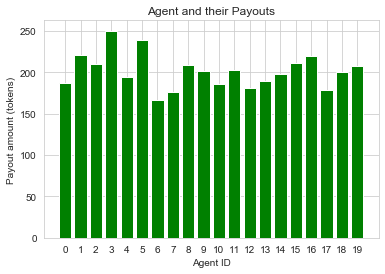

In [3]:
t = 600 # t is the last timestep

import matplotlib.pyplot as plt

S_free = experiments.dataset[0].supply_free[t]
S_0 = experiments.dataset[0].supply_0[t]
S_1 = experiments.dataset[0].supply_1[t]

agents_id = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
payout_list = []

for a in agents_id:
    #print(a)
    q1 = experiments.dataset[0].agents[t].agent_attestations_1[a]
    q0 = experiments.dataset[0].agents[t].agent_attestations_0[a]
    
    s_free = experiments.dataset[0].agents[t].agent_supply_free[a]
    s1 = experiments.dataset[0].agents[t].agent_supply_1[a]
    s0 = experiments.dataset[0].agents[t].agent_supply_0[a]
    s = s_free + s1 + s0
    
    agent_private_alpha = experiments.dataset[0].agents[t].agent_private_alpha[a]

    Q0 = experiments.dataset[0].attestations_0[t]
    Q1 = 1 #experiments.dataset[0].attestations_1[t]

    R = experiments.dataset[0].reserve[t]
    S = experiments.dataset[0].supply[t]

    C = 72000 # experiments.C
    alpha = experiments.dataset[0].alpha[t]
    
    # At the time of settlement, if alpha < 0.5, we consider it to be 0. If alpha > 0.5, we consider it to be 1. 
    # Thus Settlement Conditions apply
    if alpha < 0.5:
        alpha = 0
    elif alpha > 0.5:
        alpha = 1
    
    #print("s_free = ", s_free, "| S = ", S)
    T1 = (s_free/S)*(C*alpha + R)
    T2 = (s1/(S-S_0))*alpha*(C+R)
    T3 = (s0/(S-S_1))*(1-alpha)*(R)
    #print("T1 = ", T1, "| T2 = ", T2, "| T3 = ", T3)

    agent_payout = T1+T2+T3
    payout_list.append(agent_payout)
    #print(a, "'s Payout = ", agent_payout, "| Private Alpha = ", agent_private_alpha)

#plt.plot(payout_list)

arr2d = np.array(payout_list)

arr1d = arr2d.flatten()

x = agents_id
payouts = arr1d

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, payouts, color='green')
plt.xlabel("Agent ID")
plt.ylabel("Payout amount (tokens)")
plt.title("Agent and their Payouts")

plt.xticks(x_pos, x)

plt.show()

### Experiment 1: Inference

Agents earn a significantly larger payout when being able to participate in both the bonding curve as well as the prediction market mechanism. The greater variation in agents' payouts in Test Case B suggests that the earning potential each individual agent is magnified by the actions they take.

## Experiment 2: Test Battery for Continuous Funding and Secondary Market Mechanisms
#### Each binary combination of 3 factors - Continuous Funding, Burn on Primary Market, and Private Alpha - are examined.

### Experiment Setup

We run controlled experiments where Continuous Funding, Burn on Primary Market, and Private Alpha are controlled by being set to the following values:

- Continuous Funding can be enabled $1$ or disabled $0$
- Burn on Primary Market can be enabled $1$ or disabled $0$
- Private Alpha $\hat\alpha$ can take on the forms: steadily increasing $\uparrow$, or steadily decreasing $\downarrow$ 

Every combination of the signal forms is tested in the experiments; see table below.

- 1 indcates that a mechanism is enabled
- 0 indicates that a mechanism is disabled
- $\uparrow$ indicates a **controlled and increasing** signal
- $\downarrow$ indicates a **controlled and decreasing** signal

| | A | B | C | D | E | F | G | H |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Continuous Funding | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 
| Burn on Primary Market | 0 | 0 | 1 | 1 | 0 | 0 | 1 | 1 |  
| Private Alpha $\hat\alpha$ | $\downarrow$ | $\downarrow$ | $\downarrow$ | $\downarrow$ | $\uparrow$ | $\uparrow$ | $\uparrow$ | $\uparrow$ | 

This is a controlled experiment where all factors and parameters are maintained to be the same across both test cases, except for Continuous Funding, Burn on Primary Market, and Private Alpha.

### Test Case A: Continuous Funding Disabled. Burn on primary market Disabled. Private Alpha decreasing.

ENABLE_CONTINUOUS = [False] <br>
ENABLE_BURN = [False] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly decreasing

#### Result

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


ALPHA =  0.03536977491961415
KAPPA =  1.0385852090032155
Initial Conditions (config.py) :  {'reserve': 66000, 'pbar': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 132000.0, 'alpha': 0.03536977491961415, 'alpha_bar': 0.03536977491961415, 'supply_0': 30000, 'supply_1': 100, 'supply_free': 101900.0, 'attestations': 30000, 'attestations_0': 30000, 'attestations_1': 100, 'invariant_V': 264000.0, 'invariant_I': 68546.62379421222, 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0    0                     0                     0            100   
1    1                     0                     0            100   
2    2                     0                     0            100   
3    3                     0                     0            100   
4    4                     0                     0            100   
5    5                     0                     0            100   
6    6                     0                     0          

19                        0.0  
--------------TIMESTEP 7 --------------
CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
14  14.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
14             0.0             0.0      -5.820766e-11                0.475   

    agent_private_price  agent_private_alpha_signal  \
14                0.475                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
14                         0.0                        0.0   

    agent_public_price_signal  
14                        0.0   Time  7
agent['agent_private_price'] =  0.46
agent['agent_private_alpha'] =  0.46
r 100.0
No trade. P =  0.5192926045016093 private_price =  0.46
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016093 private_price =  0.46
Agent supply too low. Cannot a

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
5  5.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
5             0.0             0.0      -5.820766e-11                 0.43   

   agent_private_price  agent_private_alpha_signal  \
5                 0.43                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
5                         0.0                        0.0   

   agent_public_price_signal  
5                        0.0   Time  14
---------END OF TIMESTEP 14 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0     

r 100.0
No trade. P =  0.5192926045016127 private_price =  0.39999999999999997
Agent supply too low. Cannot attest
PRICE (ATTEST):  0.519292604501613
S =  131999.9999999987
KAPPA  =  1.0385852090032155
R =  66000
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
16  16.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
16             0.0             0.0      -5.820766e-11                  0.4   

    agent_private_price  agent_private_alpha_signal  \
16                  0.4                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
16                         0.0                        0.0   

    agent_public_price_signal  
16                        0.0   Time  20
---------END OF TIMESTEP 20 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0               

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -8.731149e-11                0.410   
16             0.0             0.0      -5.820766e-11                0.400   
17             0.0             0.0       0.000000e+00                0.500   
18             0.0             0.0      -2.037268e-10                0.380   
19             0.0             0.0      -2.037268e-10                0.445   

    agent_private_price  agent_private_alpha_signal  \
15                0.410                         0

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             0.0             0.0      -8.731149e-11                0.335   

   agent_private_price  agent_private_alpha_signal  \
0                0.335                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
0                         0.0                        0.0   

   agent_public_price_signal  
0                        0.0   Time  33
---------END OF TIMESTEP 33 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0     

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -1.455192e-10                0.325   
16             0.0             0.0      -5.820766e-11                0.400   
17             0.0             0.0       0.000000e+00                0.500   
18             0.0             0.0      -2.037268e-10                0.380   
19             0.0             0.0      -2.619345e-10                0.320   

    agent_private_price  agent_private_alpha_signal  \
15                0.325                         0

S =  131999.99999999697
KAPPA  =  1.0385852090032155
R =  66000
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -2.619345e-10                0.265   

    agent_private_price  agent_private_alpha_signal  \
15                0.265                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
15                         0.0                        0.0   

    agent_public_price_signal  
15                        0.0   Time  47
---------END OF TIMESTEP 47 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0

CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
4  4.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
4             0.0             0.0      -5.820766e-11                 0.42   

   agent_private_price  agent_private_alpha_signal  \
4                 0.42                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
4                         0.0                        0.0   

   agent_public_price_signal  
4                        0.0   Time  53
agent['agent_private_price'] =  0.22999999999999998
agent['agent_private_alpha'] =  0.22999999999999998
r 100.0
No trade. P =  0.5192926045016213 private_price =  0.22999999999999998
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016213 private_price =  0.22999999999999998
Agent supply too low. Cannot attest
r 100.0
No trade.

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
14  14.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
14             0.0             0.0      -3.201421e-10                  0.2   

    agent_private_price  agent_private_alpha_signal  \
14                  0.2                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
14                         0.0                        0.0   

    agent_public_price_signal  
14                        0.0   Time  60
---------END OF TIMESTEP 60 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0               

CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
4  4.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
4             0.0             0.0      -2.619345e-10                0.175   

   agent_private_price  agent_private_alpha_signal  \
4                0.175                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
4                         0.0                        0.0   

   agent_public_price_signal  
4                        0.0   Time  67
agent['agent_private_price'] =  0.15999999999999998
agent['agent_private_alpha'] =  0.15999999999999998
r 100.0
No trade. P =  0.5192926045016247 private_price =  0.15999999999999998
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016247 private_price =  0.15999999999999998
Agent supply too low. Cannot attest
r 100.0
No trade.

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
16  16.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
16             0.0             0.0      -1.746230e-10                 0.12   

    agent_private_price  agent_private_alpha_signal  \
16                 0.12                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
16                         0.0                        0.0   

    agent_public_price_signal  
16                        0.0   Time  76
---------END OF TIMESTEP 76 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0               

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
11  11.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
11             0.0             0.0      -2.910383e-10                0.085   

    agent_private_price  agent_private_alpha_signal  \
11                0.085                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
11                         0.0                        0.0   

    agent_public_price_signal  
11                        0.0   Time  83
---------END OF TIMESTEP 83 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0               

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -4.947651e-10                 0.06   
16             0.0             0.0      -2.910383e-10                 0.09   
17             0.0             0.0      -5.820766e-11                 0.19   
18             0.0             0.0      -4.074536e-10                 0.07   
19             0.0             0.0      -3.492460e-10                 0.11   

    agent_private_price  agent_private_alpha_signal  \
15                 0.06                         0

No trade. P =  0.519292604501633 private_price =  0.0050000000000000044
Agent supply too low. Cannot attest
PRICE (ATTEST):  0.5192926045016331
S =  131999.99999999354
KAPPA  =  1.0385852090032155
R =  66000
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
13  13.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
13             0.0             0.0      -2.619345e-10                0.005   

    agent_private_price  agent_private_alpha_signal  \
13                0.005                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
13                         0.0                        0.0   

    agent_public_price_signal  
13                        0.0   Time  99
---------END OF TIMESTEP 99 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0

In [2]:
experiments = run.run()

config_ids =  [{'M': {'starting_kappa': 2, 'starting_alpha': 0.03536977491961415, 'money_raised': 66000, 'monthly_instalment': 3000, 'C': 72000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 1200, 'rules_price': 'martin', 'E': 0.2, 'ENABLE_CONTINUOUS': False, 'THETA': 0.9, 'ENABLE_BURN': False, 'fee_numerator': 997, 'fee_denominator': 1000}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}]


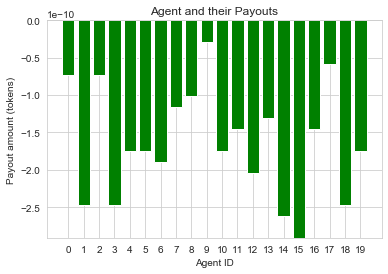

In [3]:
t = 600 # t is the last timestep

import matplotlib.pyplot as plt

S_free = experiments.dataset[0].supply_free[t]
S_0 = experiments.dataset[0].supply_0[t]
S_1 = experiments.dataset[0].supply_1[t]

agents_id = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
payout_list = []

for a in agents_id:
    #print(a)
    q1 = experiments.dataset[0].agents[t].agent_attestations_1[a]
    q0 = experiments.dataset[0].agents[t].agent_attestations_0[a]
    
    s_free = experiments.dataset[0].agents[t].agent_supply_free[a]
    s1 = experiments.dataset[0].agents[t].agent_supply_1[a]
    s0 = experiments.dataset[0].agents[t].agent_supply_0[a]
    s = s_free + s1 + s0
    
    agent_private_alpha = experiments.dataset[0].agents[t].agent_private_alpha[a]

    Q0 = experiments.dataset[0].attestations_0[t]
    Q1 = 1 #experiments.dataset[0].attestations_1[t]

    R = experiments.dataset[0].reserve[t]
    S = experiments.dataset[0].supply[t]

    C = 72000 # experiments.C
    alpha = experiments.dataset[0].alpha[t]
    
    # At the time of settlement, if alpha < 0.5, we consider it to be 0. If alpha > 0.5, we consider it to be 1. 
    # Thus Settlement Conditions apply
    if alpha < 0.5:
        alpha = 0
    elif alpha > 0.5:
        alpha = 1
    
    #print("s_free = ", s_free, "| S = ", S)
    T1 = (s_free/S)*(C*alpha + R)
    T2 = (s1/(S-S_0))*alpha*(C+R)
    T3 = (s0/(S-S_1))*(1-alpha)*(R)
    #print("T1 = ", T1, "| T2 = ", T2, "| T3 = ", T3)

    agent_payout = T1+T2+T3
    payout_list.append(agent_payout)
    #print(a, "'s Payout = ", agent_payout, "| Private Alpha = ", agent_private_alpha)

#plt.plot(payout_list)

arr2d = np.array(payout_list)

arr1d = arr2d.flatten()

x = agents_id
payouts = arr1d

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, payouts, color='green')
plt.xlabel("Agent ID")
plt.ylabel("Payout amount (tokens)")
plt.title("Agent and their Payouts")

plt.xticks(x_pos, x)

plt.show()

In [4]:
average_agent_payout = sum(payouts)/len(payouts)
print("Average Agent Payout = ", average_agent_payout)

Average Agent Payout =  -1.629814505577168e-10


### Test Case B: Continuous Funding Enabled. Burn on primary market Disabled. Private Alpha decreasing.

ENABLE_CONTINUOUS = [True] <br>
ENABLE_BURN = [False] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly decreasing

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


ALPHA =  0.03536977491961415
KAPPA =  1.0385852090032155
Initial Conditions (config.py) :  {'reserve': 66000, 'pbar': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 132000.0, 'alpha': 0.03536977491961415, 'alpha_bar': 0.03536977491961415, 'supply_0': 30000, 'supply_1': 100, 'supply_free': 101900.0, 'attestations': 30000, 'attestations_0': 30000, 'attestations_1': 100, 'invariant_V': 264000.0, 'invariant_I': 68546.62379421222, 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0    0                     0                     0            100   
1    1                     0                     0            100   
2    2                     0                     0            100   
3    3                     0                     0            100   
4    4                     0                     0            100   
5    5                     0                     0            100   
6    6                     0                     0          

KAPPA  =  1.0385852090032155
R =  66000.0
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
18  18.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
18             0.0             0.0      -5.820766e-11                 0.48   

    agent_private_price  agent_private_alpha_signal  \
18                 0.48                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
18                         0.0                        0.0   

    agent_public_price_signal  
18                        0.0   Time  4
---------END OF TIMESTEP 4 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  1

--------------TIMESTEP 9 --------------
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
2  2.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
2             0.0             0.0                0.0                  0.5   

   agent_private_price  agent_private_alpha_signal  \
2                  0.5                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
2                         0.0                        0.0   

   agent_public_price_signal  
2                        0.0   Time  9
agent['agent_private_price'] =  0.45
agent['agent_private_alpha'] =  0.45
r 100.0
No trade. P =  0.51929260450161 private_price =  0.45
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.51929260450161 private_price =  0.45
Agent supply too low. Cannot attest
r 100.0
No trade. P =  0.51929260450161 pr

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0       0.000000e+00                0.500   
16             0.0             0.0       0.000000e+00                0.500   
17             0.0             0.0      -8.731149e-11                0.455   
18             0.0             0.0      -5.820766e-11                0.480   
19             0.0             0.0       0.000000e+00                0.500   

    agent_private_price  agent_private_alpha_signal  \
15                0.500                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -5.820766e-11                 0.42   
16             0.0             0.0      -1.455192e-10                 0.41   
17             0.0             0.0      -1.455192e-10                 0.39   
18             0.0             0.0      -5.820766e-11                 0.48   
19             0.0             0.0       0.000000e+00                 0.50   

    agent_private_price  agent_private_alpha_signal  \
15                 0.42                         0

16                        0.0   Time  28
agent['agent_private_price'] =  0.355
agent['agent_private_alpha'] =  0.355
r 100.0
No trade. P =  0.519292604501615 private_price =  0.355
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016149 private_price =  0.355
Agent supply too low. Cannot attest
r 100.0
No trade. P =  0.5192926045016149 private_price =  0.355
Agent supply too low. Cannot attest
PRICE (ATTEST):  0.5192926045016153
S =  131999.9999999981
KAPPA  =  1.0385852090032155
R =  66000.0
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
16  16.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
16             0.0             0.0      -2.037268e-10                0.355   

    agent_private_price  agent_private_alpha_signal  \
16                0.355                         0.0   

    age

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -5.820766e-11                0.420   
16             0.0             0.0      -2.619345e-10                0.350   
17             0.0             0.0      -3.492460e-10                0.360   
18             0.0             0.0      -1.455192e-10                0.385   
19             0.0             0.0       0.000000e+00                0.500   

    agent_private_price  agent_private_alpha_signal  \
15                0.420                         0

CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
7  7.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
7             0.0             0.0      -8.731149e-11                0.445   

   agent_private_price  agent_private_alpha_signal  \
7                0.445                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
7                         0.0                        0.0   

   agent_public_price_signal  
7                        0.0   Time  41
agent['agent_private_price'] =  0.29000000000000004
agent['agent_private_alpha'] =  0.29000000000000004
r 100.0
No trade. P =  0.5192926045016181 private_price =  0.29000000000000004
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016183 private_price =  0.29000000000000004
Agent supply too low. Cannot attest
r 100.0
No trade.

---------END OF TIMESTEP 48 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -5.820766e-11                0.420   
16             0.0             0.0      -2.619345e-10                0.350   
17             0.0             0.0      -3.492460e-10                0.360   
18             0.0             0.0      -2.619345e-10                0.265   
19             0.0             0.0       0.000000e+00                0.500   

    agent_private_price  agent_private_alpha_signal  \
15       

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -5.820766e-11                0.420   
16             0.0             0.0      -2.619345e-10                0.350   
17             0.0             0.0      -3.492460e-10                0.360   
18             0.0             0.0      -3.492460e-10                0.235   
19             0.0             0.0      -5.820766e-11                0.250   

    agent_private_price  agent_private_alpha_signal  \
15                0.420                         0

R =  66000.0
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
10  10.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
10             0.0             0.0      -1.455192e-10                0.195   

    agent_private_price  agent_private_alpha_signal  \
10                0.195                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
10                         0.0                        0.0   

    agent_public_price_signal  
10                        0.0   Time  61
---------END OF TIMESTEP 61 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0  

r 100.0
No trade. P =  0.5192926045016244 private_price =  0.16999999999999998
Agent supply too low. Cannot attest
PRICE (ATTEST):  0.5192926045016245
S =  131999.99999999575
KAPPA  =  1.0385852090032155
R =  66000.0
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1             0.0             0.0      -2.328306e-10                 0.17   

   agent_private_price  agent_private_alpha_signal  \
1                 0.17                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
1                         0.0                        0.0   

   agent_public_price_signal  
1                        0.0   Time  66
---------END OF TIMESTEP 66 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0 

CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
12  12.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
12             0.0             0.0      -1.746230e-10                 0.15   

    agent_private_price  agent_private_alpha_signal  \
12                 0.15                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
12                         0.0                        0.0   

    agent_public_price_signal  
12                        0.0   Time  72
agent['agent_private_price'] =  0.135
agent['agent_private_alpha'] =  0.135
r 100.0
No trade. P =  0.519292604501626 private_price =  0.135
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.519292604501626 private_price =  0.135
Agent supply too low. Cannot attest
r 100.0
No trade. P =  0.519292604501626 private_price =  0.135

12                        0.0   Time  79
agent['agent_private_price'] =  0.09999999999999998
agent['agent_private_alpha'] =  0.09999999999999998
r 100.0
No trade. P =  0.5192926045016278 private_price =  0.09999999999999998
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016278 private_price =  0.09999999999999998
Agent supply too low. Cannot attest
r 100.0
No trade. P =  0.5192926045016278 private_price =  0.09999999999999998
Agent supply too low. Cannot attest
PRICE (ATTEST):  0.5192926045016281
S =  131999.99999999485
KAPPA  =  1.0385852090032155
R =  66000.0
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
12  12.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
12             0.0             0.0      -3.201421e-10                  0.1   

    agent_private_price  agent_private_alpha_s

10                        0.0   Time  86
---------END OF TIMESTEP 86 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -5.820766e-11                0.420   
16             0.0             0.0      -3.201421e-10                0.115   
17             0.0             0.0      -5.820766e-10                0.095   
18             0.0             0.0      -4.074536e-10                0.090   
19             0.0             0.0      -1.164153e-10                0.175   

    agent_private_price

r 100.0
No trade. P =  0.5192926045016311 private_price =  0.03999999999999998
Agent supply too low. Cannot attest
r 100.0
No trade. P =  0.5192926045016311 private_price =  0.03999999999999998
Agent supply too low. Cannot attest
PRICE (ATTEST):  0.5192926045016314
S =  131999.999999994
KAPPA  =  1.0385852090032155
R =  66000.0
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
5  5.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
5             0.0             0.0      -4.656613e-10                 0.04   

   agent_private_price  agent_private_alpha_signal  \
5                 0.04                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
5                         0.0                        0.0   

   agent_public_price_signal  
5                        0.0   Time  92
---------END OF TIMESTEP 92 -----------
      id  a

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -5.820766e-11                0.420   
16             0.0             0.0      -4.074536e-10                0.035   
17             0.0             0.0      -5.820766e-10                0.095   
18             0.0             0.0      -4.074536e-10                0.090   
19             0.0             0.0      -1.746230e-10                0.065   

    agent_private_price  agent_private_alpha_signal  \
15                0.420                         0

In [2]:
experiments = run.run()

config_ids =  [{'M': {'starting_kappa': 2, 'starting_alpha': 0.03536977491961415, 'money_raised': 66000, 'monthly_instalment': 3000, 'C': 72000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 1200, 'rules_price': 'martin', 'E': 0.2, 'ENABLE_CONTINUOUS': True, 'THETA': 0.9, 'ENABLE_BURN': False, 'fee_numerator': 997, 'fee_denominator': 1000}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}]


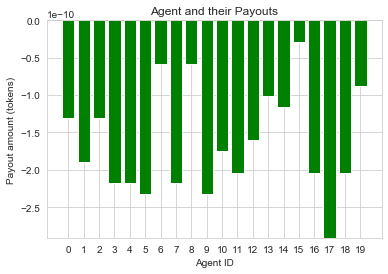

In [3]:
t = 600 # t is the last timestep

import matplotlib.pyplot as plt

S_free = experiments.dataset[0].supply_free[t]
S_0 = experiments.dataset[0].supply_0[t]
S_1 = experiments.dataset[0].supply_1[t]

agents_id = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
payout_list = []

for a in agents_id:
    #print(a)
    q1 = experiments.dataset[0].agents[t].agent_attestations_1[a]
    q0 = experiments.dataset[0].agents[t].agent_attestations_0[a]
    
    s_free = experiments.dataset[0].agents[t].agent_supply_free[a]
    s1 = experiments.dataset[0].agents[t].agent_supply_1[a]
    s0 = experiments.dataset[0].agents[t].agent_supply_0[a]
    s = s_free + s1 + s0
    
    agent_private_alpha = experiments.dataset[0].agents[t].agent_private_alpha[a]

    Q0 = experiments.dataset[0].attestations_0[t]
    Q1 = 1 #experiments.dataset[0].attestations_1[t]

    R = experiments.dataset[0].reserve[t]
    S = experiments.dataset[0].supply[t]

    C = 72000 # experiments.C
    alpha = experiments.dataset[0].alpha[t]
    
    # At the time of settlement, if alpha < 0.5, we consider it to be 0. If alpha > 0.5, we consider it to be 1. 
    # Thus Settlement Conditions apply
    if alpha < 0.5:
        alpha = 0
    elif alpha > 0.5:
        alpha = 1
    
    #print("s_free = ", s_free, "| S = ", S)
    T1 = (s_free/S)*(C*alpha + R)
    T2 = (s1/(S-S_0))*alpha*(C+R)
    T3 = (s0/(S-S_1))*(1-alpha)*(R)
    #print("T1 = ", T1, "| T2 = ", T2, "| T3 = ", T3)

    agent_payout = T1+T2+T3
    payout_list.append(agent_payout)
    #print(a, "'s Payout = ", agent_payout, "| Private Alpha = ", agent_private_alpha)

#plt.plot(payout_list)

arr2d = np.array(payout_list)

arr1d = arr2d.flatten()

x = agents_id
payouts = arr1d

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, payouts, color='green')
plt.xlabel("Agent ID")
plt.ylabel("Payout amount (tokens)")
plt.title("Agent and their Payouts")

plt.xticks(x_pos, x)

plt.show()

In [4]:
average_agent_payout = sum(payouts)/len(payouts)
print("Average Agent Payout = ", average_agent_payout)

Average Agent Payout =  -1.6298145055771677e-10


### Test Case C: Continuous Funding Disabled. Burn on primary marketEnabled. Private Alpha decreasing.

ENABLE_CONTINUOUS = [False] <br>
ENABLE_BURN = [True] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly decreasing

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


ALPHA =  0.03536977491961415
KAPPA =  1.0385852090032155
Initial Conditions (config.py) :  {'reserve': 66000, 'pbar': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 132000.0, 'alpha': 0.03536977491961415, 'alpha_bar': 0.03536977491961415, 'supply_0': 30000, 'supply_1': 100, 'supply_free': 101900.0, 'attestations': 30000, 'attestations_0': 30000, 'attestations_1': 100, 'invariant_V': 264000.0, 'invariant_I': 68546.62379421222, 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0    0                     0                     0            100   
1    1                     0                     0            100   
2    2                     0                     0            100   
3    3                     0                     0            100   
4    4                     0                     0            100   
5    5                     0                     0            100   
6    6                     0                     0          

6                        0.0   Time  6
agent['agent_private_price'] =  0.46499999999999997
agent['agent_private_alpha'] =  0.46499999999999997
r 100.0
No trade. P =  0.519292604501609 private_price =  0.46499999999999997
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.519292604501609 private_price =  0.46499999999999997
Agent supply too low. Cannot attest
r 100.0
No trade. P =  0.519292604501609 private_price =  0.46499999999999997
Agent supply too low. Cannot attest
PRICE (ATTEST):  0.5192926045016093
S =  131999.99999999962
KAPPA  =  1.0385852090032155
R =  66000.0
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
6  6.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
6             0.0             0.0      -5.820766e-11                0.465   

   agent_private_price  agent_private_alpha_signal  \
6  

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
9  9.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
9             0.0             0.0      -1.746230e-10                0.435   

   agent_private_price  agent_private_alpha_signal  \
9                0.435                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
9                         0.0                        0.0   

   agent_public_price_signal  
9                        0.0   Time  13
---------END OF TIMESTEP 13 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0     

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0       0.000000e+00                0.500   
16             0.0             0.0      -2.328306e-10                0.410   
17             0.0             0.0      -5.820766e-11                0.480   
18             0.0             0.0       0.000000e+00                0.500   
19             0.0             0.0      -8.731149e-11                0.445   

    agent_private_price  agent_private_alpha_signal  \
15                0.500                         0

4                        0.0   Time  27
---------END OF TIMESTEP 27 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0       0.000000e+00                0.500   
16             0.0             0.0      -2.328306e-10                0.410   
17             0.0             0.0      -5.820766e-11                0.480   
18             0.0             0.0       0.000000e+00                0.500   
19             0.0             0.0      -8.731149e-11                0.445   

    agent_private_price 

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0       0.000000e+00                0.500   
16             0.0             0.0      -2.910383e-10                0.360   
17             0.0             0.0      -1.455192e-10                0.335   
18             0.0             0.0      -5.820766e-11                0.350   
19             0.0             0.0      -1.455192e-10                0.355   

    agent_private_price  agent_private_alpha_signal  \
15                0.500                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0       0.000000e+00                0.500   
16             0.0             0.0      -2.910383e-10                0.360   
17             0.0             0.0      -2.037268e-10                0.305   
18             0.0             0.0      -5.820766e-11                0.350   
19             0.0             0.0      -1.455192e-10                0.355   

    agent_private_price  agent_private_alpha_signal  \
15                0.500                         0

KAPPA  =  1.0385852090032155
R =  66000.0
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
12  12.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
12             0.0             0.0      -2.910383e-10                 0.26   

    agent_private_price  agent_private_alpha_signal  \
12                 0.26                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
12                         0.0                        0.0   

    agent_public_price_signal  
12                        0.0   Time  48
---------END OF TIMESTEP 48 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18 

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
9  9.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
9             0.0             0.0      -3.492460e-10                0.225   

   agent_private_price  agent_private_alpha_signal  \
9                0.225                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
9                         0.0                        0.0   

   agent_public_price_signal  
9                        0.0   Time  55
---------END OF TIMESTEP 55 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0     

CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1             0.0             0.0      -1.455192e-10                 0.31   

   agent_private_price  agent_private_alpha_signal  \
1                 0.31                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
1                         0.0                        0.0   

   agent_public_price_signal  
1                        0.0   Time  62
agent['agent_private_price'] =  0.185
agent['agent_private_alpha'] =  0.185
r 100.0
No trade. P =  0.5192926045016234 private_price =  0.185
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016235 private_price =  0.185
Agent supply too low. Cannot attest
r 100.0
No trade. P =  0.5192926045016235 private_price =  0.185
Agent su

8                        0.0   Time  70
agent['agent_private_price'] =  0.14500000000000002
agent['agent_private_alpha'] =  0.14500000000000002
r 100.0
No trade. P =  0.5192926045016255 private_price =  0.14500000000000002
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016255 private_price =  0.14500000000000002
Agent supply too low. Cannot attest
r 100.0
No trade. P =  0.5192926045016255 private_price =  0.14500000000000002
Agent supply too low. Cannot attest
PRICE (ATTEST):  0.5192926045016257
S =  131999.99999999543
KAPPA  =  1.0385852090032155
R =  66000.0
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
8  8.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
8             0.0             0.0      -2.037268e-10                0.145   

   agent_private_price  agent_private_alpha_signal  \

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -1.164153e-10                0.170   
16             0.0             0.0      -4.074536e-10                0.230   
17             0.0             0.0      -2.037268e-10                0.305   
18             0.0             0.0      -5.820766e-11                0.350   
19             0.0             0.0      -3.492460e-10                0.190   

    agent_private_price  agent_private_alpha_signal  \
15                0.170                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -1.746230e-10                0.100   
16             0.0             0.0      -4.947651e-10                0.085   
17             0.0             0.0      -2.619345e-10                0.090   
18             0.0             0.0      -5.820766e-11                0.350   
19             0.0             0.0      -4.074536e-10                0.105   

    agent_private_price  agent_private_alpha_signal  \
15                0.100                         0

CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
13  13.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
13             0.0             0.0      -2.037268e-10                0.055   

    agent_private_price  agent_private_alpha_signal  \
13                0.055                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
13                         0.0                        0.0   

    agent_public_price_signal  
13                        0.0   Time  92
agent['agent_private_price'] =  0.034999999999999976
agent['agent_private_alpha'] =  0.034999999999999976
r 100.0
No trade. P =  0.5192926045016314 private_price =  0.034999999999999976
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016314 private_price =  0.034999999999999976
Agent supply too low. Cannot attest
r

r 100.0
No trade. P =  0.5192926045016333 private_price =  0.0
Agent supply too low. Cannot attest
r 100.0
No trade. P =  0.5192926045016333 private_price =  0.0
Agent supply too low. Cannot attest
PRICE (ATTEST):  0.5192926045016334
S =  131999.99999999348
KAPPA  =  1.0385852090032155
R =  66000.0
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
5  5.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
5             0.0             0.0      -2.619345e-10                  0.0   

   agent_private_price  agent_private_alpha_signal  \
5                  0.0                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
5                         0.0                        0.0   

   agent_public_price_signal  
5                        0.0   Time  100
---------END OF TIMESTEP 100 -----------
Total execution time: 3.14s


In [2]:
experiments = run.run()

config_ids =  [{'M': {'starting_kappa': 2, 'starting_alpha': 0.03536977491961415, 'money_raised': 66000, 'monthly_instalment': 3000, 'C': 72000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 1200, 'rules_price': 'martin', 'E': 0.2, 'ENABLE_CONTINUOUS': False, 'THETA': 0.9, 'ENABLE_BURN': True, 'fee_numerator': 997, 'fee_denominator': 1000}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}]


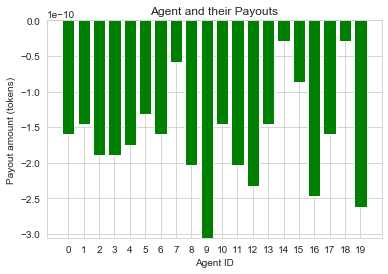

In [3]:
t = 600 # t is the last timestep

import matplotlib.pyplot as plt

S_free = experiments.dataset[0].supply_free[t]
S_0 = experiments.dataset[0].supply_0[t]
S_1 = experiments.dataset[0].supply_1[t]

agents_id = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
payout_list = []

for a in agents_id:
    #print(a)
    q1 = experiments.dataset[0].agents[t].agent_attestations_1[a]
    q0 = experiments.dataset[0].agents[t].agent_attestations_0[a]
    
    s_free = experiments.dataset[0].agents[t].agent_supply_free[a]
    s1 = experiments.dataset[0].agents[t].agent_supply_1[a]
    s0 = experiments.dataset[0].agents[t].agent_supply_0[a]
    s = s_free + s1 + s0
    
    agent_private_alpha = experiments.dataset[0].agents[t].agent_private_alpha[a]

    Q0 = experiments.dataset[0].attestations_0[t]
    Q1 = 1 #experiments.dataset[0].attestations_1[t]

    R = experiments.dataset[0].reserve[t]
    S = experiments.dataset[0].supply[t]

    C = 72000 # experiments.C
    alpha = experiments.dataset[0].alpha[t]
    
    # At the time of settlement, if alpha < 0.5, we consider it to be 0. If alpha > 0.5, we consider it to be 1. 
    # Thus Settlement Conditions apply
    if alpha < 0.5:
        alpha = 0
    elif alpha > 0.5:
        alpha = 1
    
    #print("s_free = ", s_free, "| S = ", S)
    T1 = (s_free/S)*(C*alpha + R)
    T2 = (s1/(S-S_0))*alpha*(C+R)
    T3 = (s0/(S-S_1))*(1-alpha)*(R)
    #print("T1 = ", T1, "| T2 = ", T2, "| T3 = ", T3)

    agent_payout = T1+T2+T3
    payout_list.append(agent_payout)
    #print(a, "'s Payout = ", agent_payout, "| Private Alpha = ", agent_private_alpha)

#plt.plot(payout_list)

arr2d = np.array(payout_list)

arr1d = arr2d.flatten()

x = agents_id
payouts = arr1d

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, payouts, color='green')
plt.xlabel("Agent ID")
plt.ylabel("Payout amount (tokens)")
plt.title("Agent and their Payouts")

plt.xticks(x_pos, x)

plt.show()

In [4]:
average_agent_payout = sum(payouts)/len(payouts)
print("Average Agent Payout = ", average_agent_payout)

Average Agent Payout =  -1.6298145055771674e-10


### Test Case D: Continuous Funding Enabled. Burn on primary market Enabled. Private Alpha decreasing.

ENABLE_CONTINUOUS = [True] <br>
ENABLE_BURN = [True] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly decreasing

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


ALPHA =  0.03536977491961415
KAPPA =  1.0385852090032155
Initial Conditions (config.py) :  {'reserve': 66000, 'pbar': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 132000.0, 'alpha': 0.03536977491961415, 'alpha_bar': 0.03536977491961415, 'supply_0': 30000, 'supply_1': 100, 'supply_free': 101900.0, 'attestations': 30000, 'attestations_0': 30000, 'attestations_1': 100, 'invariant_V': 264000.0, 'invariant_I': 68546.62379421222, 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0    0                     0                     0            100   
1    1                     0                     0            100   
2    2                     0                     0            100   
3    3                     0                     0            100   
4    4                     0                     0            100   
5    5                     0                     0            100   
6    6                     0                     0          

19                        0.0  
--------------TIMESTEP 6 --------------
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             0.0             0.0      -5.820766e-11                0.475   

   agent_private_price  agent_private_alpha_signal  \
0                0.475                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
0                         0.0                        0.0   

   agent_public_price_signal  
0                        0.0   Time  6
agent['agent_private_price'] =  0.46499999999999997
agent['agent_private_alpha'] =  0.46499999999999997
r 100.0
No trade. P =  0.519292604501609 private_price =  0.46499999999999997
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.519292604501609 private_price =  0.46

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0       0.000000e+00                0.500   
16             0.0             0.0      -8.731149e-11                0.440   
17             0.0             0.0       0.000000e+00                0.500   
18             0.0             0.0      -8.731149e-11                0.485   
19             0.0             0.0      -5.820766e-11                0.480   

    agent_private_price  agent_private_alpha_signal  \
15                0.500                         0

19                        0.0  
--------------TIMESTEP 19 --------------
CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
13  13.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
13             0.0             0.0                0.0                  0.5   

    agent_private_price  agent_private_alpha_signal  \
13                  0.5                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
13                         0.0                        0.0   

    agent_public_price_signal  
13                        0.0   Time  19
agent['agent_private_price'] =  0.39999999999999997
agent['agent_private_alpha'] =  0.39999999999999997
r 100.0
No trade. P =  0.5192926045016127 private_price =  0.39999999999999997
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016127 priva

19                        0.0  
--------------TIMESTEP 25 --------------
CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
12  12.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
12             0.0             0.0      -5.820766e-11                 0.42   

    agent_private_price  agent_private_alpha_signal  \
12                 0.42                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
12                         0.0                        0.0   

    agent_public_price_signal  
12                        0.0   Time  25
agent['agent_private_price'] =  0.37
agent['agent_private_alpha'] =  0.37
r 100.0
No trade. P =  0.5192926045016142 private_price =  0.37
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016142 private_price =  0.37
Agent supply too low. Cannot

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0       0.000000e+00                0.500   
16             0.0             0.0      -1.455192e-10                0.390   
17             0.0             0.0       0.000000e+00                0.500   
18             0.0             0.0      -2.037268e-10                0.395   
19             0.0             0.0      -5.820766e-11                0.480   

    agent_private_price  agent_private_alpha_signal  \
15                0.500                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0       0.000000e+00                0.500   
16             0.0             0.0      -1.455192e-10                0.390   
17             0.0             0.0       0.000000e+00                0.500   
18             0.0             0.0      -2.037268e-10                0.395   
19             0.0             0.0      -1.455192e-10                0.335   

    agent_private_price  agent_private_alpha_signal  \
15                0.500                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -5.820766e-11                0.300   
16             0.0             0.0      -2.037268e-10                0.280   
17             0.0             0.0       0.000000e+00                0.500   
18             0.0             0.0      -2.037268e-10                0.395   
19             0.0             0.0      -2.328306e-10                0.285   

    agent_private_price  agent_private_alpha_signal  \
15                0.300                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -5.820766e-11                0.300   
16             0.0             0.0      -2.619345e-10                0.250   
17             0.0             0.0       0.000000e+00                0.500   
18             0.0             0.0      -2.910383e-10                0.260   
19             0.0             0.0      -2.328306e-10                0.285   

    agent_private_price  agent_private_alpha_signal  \
15                0.300                         0

r 100.0
No trade. P =  0.5192926045016223 private_price =  0.21
Agent supply too low. Cannot attest
r 100.0
No trade. P =  0.5192926045016223 private_price =  0.21
Agent supply too low. Cannot attest
PRICE (ATTEST):  0.5192926045016225
S =  131999.99999999625
KAPPA  =  1.0385852090032155
R =  66000.0
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
7  7.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
7             0.0             0.0      -2.619345e-10                 0.21   

   agent_private_price  agent_private_alpha_signal  \
7                 0.21                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
7                         0.0                        0.0   

   agent_public_price_signal  
7                        0.0   Time  58
---------END OF TIMESTEP 58 -----------
      id  agent_attestations_1  agent_a

6                        0.0   Time  64
---------END OF TIMESTEP 64 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -5.820766e-11                0.300   
16             0.0             0.0      -3.783498e-10                0.195   
17             0.0             0.0       0.000000e+00                0.500   
18             0.0             0.0      -3.492460e-10                0.230   
19             0.0             0.0      -2.328306e-10                0.285   

    agent_private_price 

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             0.0             0.0      -4.074536e-10                 0.14   

   agent_private_price  agent_private_alpha_signal  \
0                 0.14                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
0                         0.0                        0.0   

   agent_public_price_signal  
0                        0.0   Time  72
---------END OF TIMESTEP 72 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0     

CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1             0.0             0.0      -2.037268e-10                0.185   

   agent_private_price  agent_private_alpha_signal  \
1                0.185                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
1                         0.0                        0.0   

   agent_public_price_signal  
1                        0.0   Time  78
agent['agent_private_price'] =  0.10499999999999998
agent['agent_private_alpha'] =  0.10499999999999998
r 100.0
No trade. P =  0.5192926045016276 private_price =  0.10499999999999998
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 1
r 100.0
No trade. P =  0.5192926045016275 private_price =  0.10499999999999998
Agent supply too low. Cannot attest
r 100.0
No trade.

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
18  18.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
18             0.0             0.0      -4.656613e-10                0.075   

    agent_private_price  agent_private_alpha_signal  \
18                0.075                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
18                         0.0                        0.0   

    agent_public_price_signal  
18                        0.0   Time  85
---------END OF TIMESTEP 85 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0               

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -5.820766e-11                0.300   
16             0.0             0.0      -4.365575e-10                0.065   
17             0.0             0.0      -5.820766e-11                0.130   
18             0.0             0.0      -4.656613e-10                0.075   
19             0.0             0.0      -5.238689e-10                0.040   

    agent_private_price  agent_private_alpha_signal  \
15                0.300                         0

Total execution time: 3.32s


In [2]:
experiments = run.run()

config_ids =  [{'M': {'starting_kappa': 2, 'starting_alpha': 0.03536977491961415, 'money_raised': 66000, 'monthly_instalment': 3000, 'C': 72000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 1200, 'rules_price': 'martin', 'E': 0.2, 'ENABLE_CONTINUOUS': True, 'THETA': 0.9, 'ENABLE_BURN': True, 'fee_numerator': 997, 'fee_denominator': 1000}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}]


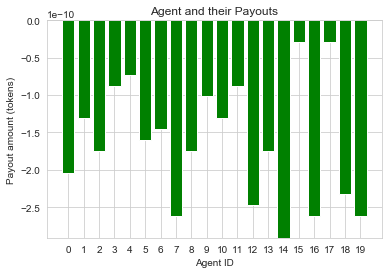

In [3]:
t = 600 # t is the last timestep

import matplotlib.pyplot as plt

S_free = experiments.dataset[0].supply_free[t]
S_0 = experiments.dataset[0].supply_0[t]
S_1 = experiments.dataset[0].supply_1[t]

agents_id = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
payout_list = []

for a in agents_id:
    #print(a)
    q1 = experiments.dataset[0].agents[t].agent_attestations_1[a]
    q0 = experiments.dataset[0].agents[t].agent_attestations_0[a]
    
    s_free = experiments.dataset[0].agents[t].agent_supply_free[a]
    s1 = experiments.dataset[0].agents[t].agent_supply_1[a]
    s0 = experiments.dataset[0].agents[t].agent_supply_0[a]
    s = s_free + s1 + s0
    
    agent_private_alpha = experiments.dataset[0].agents[t].agent_private_alpha[a]

    Q0 = experiments.dataset[0].attestations_0[t]
    Q1 = 1 #experiments.dataset[0].attestations_1[t]

    R = experiments.dataset[0].reserve[t]
    S = experiments.dataset[0].supply[t]

    C = 72000 # experiments.C
    alpha = experiments.dataset[0].alpha[t]
    
    # At the time of settlement, if alpha < 0.5, we consider it to be 0. If alpha > 0.5, we consider it to be 1. 
    # Thus Settlement Conditions apply
    if alpha < 0.5:
        alpha = 0
    elif alpha > 0.5:
        alpha = 1
    
    #print("s_free = ", s_free, "| S = ", S)
    T1 = (s_free/S)*(C*alpha + R)
    T2 = (s1/(S-S_0))*alpha*(C+R)
    T3 = (s0/(S-S_1))*(1-alpha)*(R)
    #print("T1 = ", T1, "| T2 = ", T2, "| T3 = ", T3)

    agent_payout = T1+T2+T3
    payout_list.append(agent_payout)
    #print(a, "'s Payout = ", agent_payout, "| Private Alpha = ", agent_private_alpha)

#plt.plot(payout_list)

arr2d = np.array(payout_list)

arr1d = arr2d.flatten()

x = agents_id
payouts = arr1d

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, payouts, color='green')
plt.xlabel("Agent ID")
plt.ylabel("Payout amount (tokens)")
plt.title("Agent and their Payouts")

plt.xticks(x_pos, x)

plt.show()

In [4]:
average_agent_payout = sum(payouts)/len(payouts)
print("Average Agent Payout = ", average_agent_payout)

Average Agent Payout =  -1.6298145055771677e-10


### Test Case E: Continuous Funding Disabled. Burn on primary market Disabled. Private Alpha increasing.

ENABLE_CONTINUOUS = [False] <br>
ENABLE_BURN = [False] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


ALPHA =  0.03536977491961415
KAPPA =  1.0385852090032155
Initial Conditions (config.py) :  {'reserve': 66000, 'pbar': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 132000.0, 'alpha': 0.03536977491961415, 'alpha_bar': 0.03536977491961415, 'supply_0': 30000, 'supply_1': 100, 'supply_free': 101900.0, 'attestations': 30000, 'attestations_0': 30000, 'attestations_1': 100, 'invariant_V': 264000.0, 'invariant_I': 68546.62379421222, 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0    0                     0                     0            100   
1    1                     0                     0            100   
2    2                     0                     0            100   
3    3                     0                     0            100   
4    4                     0                     0            100   
5    5                     0                     0            100   
6    6                     0                     0          

CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
5  5.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
5             0.0             0.0                0.0                  0.5   

   agent_private_price  agent_private_alpha_signal  \
5                  0.5                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
5                         0.0                        0.0   

   agent_public_price_signal  
5                        0.0   Time  5
agent['agent_private_price'] =  0.53
agent['agent_private_alpha'] =  0.53
r 100.0
No trade. P =  0.5398023147584516 private_price =  0.53
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 0.519307212871992
r 100.0
Agent burns. Amt to burn =  2.6193447149125858e-11
Positive attestation. | alpha =  0.07302572460893002 private_alpha =  0.53
amt_pos =  1.477513742751137

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.041957                   0.0       0.000001   
16  16.0              0.000000                   0.0     100.000000   
17  17.0              0.000000                   0.0     100.000000   
18  18.0              0.000000                   0.0     100.000000   
19  19.0              0.000000                   0.0     100.000000   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      110.950228             0.0          81.614012                0.520   
16        0.000000             0.0           0.000000                0.500   
17        0.000000             0.0           0.000000                0.525   
18        0.000000             0.0           0.000000                0.500   
19        0.000000             0.0           0.000000                0.550   

    agent_private_price  agent_private_alpha_signal  \
15                0.520                         0

4                        0.0   Time  18
---------END OF TIMESTEP 18 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.041957                   0.0       0.000001   
16  16.0              0.000000                   0.0     100.000000   
17  17.0              0.000000                   0.0     100.000000   
18  18.0              0.000000                   0.0     100.000000   
19  19.0              0.000000                   0.0     100.000000   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      110.950228             0.0          81.614012                0.520   
16        0.000000             0.0           0.000000                0.500   
17        0.000000             0.0           0.000000                0.525   
18        0.000000             0.0           0.000000                0.500   
19        0.000000             0.0           0.000000                0.585   

    agent_private_price 

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.041957                   0.0       0.000001   
16  16.0              0.000000                   0.0     100.000000   
17  17.0              0.000000                   0.0     100.000000   
18  18.0              0.029572                   0.0       0.000001   
19  19.0              0.000000                   0.0     100.000000   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      110.950228             0.0          81.614012                0.520   
16        0.000000             0.0           0.000000                0.500   
17        0.000000             0.0           0.000000                0.525   
18       78.575485             0.0          88.169517                0.600   
19        0.000000             0.0           0.000000                0.585   

    agent_private_price  agent_private_alpha_signal  \
15                0.520                         0

amt_Q1 =  0.018134255722753588
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.2759880974203367 private_alpha =  0.655
amt_pos =  66.06243597196334
amt_Q1 =  0.02477410718100232
PRICE (ATTEST):  0.6634625800112557
Positive attestation 1
S =  133700.878284466
KAPPA  =  1.3239631293578256
R =  66999.99999200006
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
3  3.0              0.024774                   0.0       0.000001   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
3       66.062436             0.0          87.818391                0.655   

   agent_private_price  agent_private_alpha_signal  \
3                0.655                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
3                         0.0                        0.0   

   agent_public_price_signal  
3                        0.0   Time  31
-------

r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.3272231625054671 private_alpha =  0.685
amt_pos =  59.20657190077299
amt_Q1 =  0.02217809613550481
PRICE (ATTEST):  0.6898158440083865
Positive attestation 1
S =  133953.65580110144
KAPPA  =  1.3756449461916702
R =  67170.93272523172
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
11  11.0              0.022178                   0.0       0.000001   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
11       59.206572             0.0          87.838442                0.685   

    agent_private_price  agent_private_alpha_signal  \
11                0.685                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
11                         0.0                        0.0   

    agent_public_price_signal  
11                        0.0   Time  37
---------END OF TIMESTEP

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.054452                   0.0   1.000000e-14   
16  16.0              0.000000                   0.0   1.000000e+02   
17  17.0              0.000000                   0.0   1.000000e+02   
18  18.0              0.029572                   0.0   1.000000e-06   
19  19.0              0.000000                   0.0   1.000000e+02   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      144.298407             0.0          48.265835                0.690   
16        0.000000             0.0           0.000000                0.500   
17        0.000000             0.0           0.000000                0.525   
18       78.575485             0.0          88.169517                0.600   
19        0.000000             0.0           0.000000                0.585   

    agent_private_price  agent_private_alpha_signal  \
15                0.690                         0

r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.40346101663348727 private_alpha =  0.735
amt_pos =  33.69777640061437
amt_Q1 =  0.012611577615460565
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.40346101663348727 private_alpha =  0.735
amt_pos =  29.78185867356935
amt_Q1 =  0.011146105202351493
PRICE (ATTEST):  0.7222002656372896
Positive attestation 1
S =  134240.16043723148
KAPPA  =  1.4390223736171184
R =  67370.93272794105
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
3  3.0               0.03592                   0.0   1.000000e-14   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
3       95.844295             0.0          58.036534                0.735   

   agent_private_price  agent_private_alpha_signal  \
3                0.735                         0.0   

   agent_priva

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
4  4.0              0.055674                   0.0   2.425211e-07   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
4      148.131641             0.0          19.810695                0.765   

   agent_private_price  agent_private_alpha_signal  \
4                0.765                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
4                         0.0                        0.0   

   agent_public_price_signal  
4                        0.0   Time  53
---------END OF TIMESTEP 53 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.060362                   0.0   1.000000e-22   
16  16.0              0.000000                   0.0   1.000000e+02   
17  17.0              0.000000                   0.0   1.000000e+02   
18  18.0              0.043153                   0.0   1.

PRICE pbar (from bondburn update) = -0.0001717986943831905
r 1.000000031374395e-22
Agent bonds. Amt to bond =  1.0000000213743946e-22
Positive attestation. | alpha =  0.4968078264111977 private_alpha =  0.7999999999999999
amt_pos =  15.092509805826667
amt_Q1 =  0.005633970606541424
r 1.000000031374395e-22
Agent bonds. Amt to bond =  1.0000000213743946e-22
Positive attestation. | alpha =  0.4968078264111977 private_alpha =  0.7999999999999999
amt_pos =  19.605789177661045
amt_Q1 =  0.0073186976166271026
PRICE (ATTEST):  0.7703940690687772
Positive attestation 1
S =  134811.62134017085
KAPPA  =  1.531938791352684
R =  67795.18483914618
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
18  18.0              0.050471                   0.0   1.000000e-22   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
18      134.495066             0.0          32.249937                  0.8   

    agent_private_price  agent_pri

Agent bonds. Amt to bond =  7.093273382642381e-31
Positive attestation. | alpha =  0.5067411948364703 private_alpha =  0.8249999999999998
amt_pos =  6.991983484652143
amt_Q1 =  0.002610838246109388
r 7.093273453575116e-31
Agent bonds. Amt to bond =  7.093273382642381e-31
Positive attestation. | alpha =  0.5067411948364703 private_alpha =  0.8249999999999998
amt_pos =  8.241979752414249
amt_Q1 =  0.0030775853704289933
PRICE (ATTEST):  0.7744123470787118
Positive attestation 1
S =  134811.6213401708
KAPPA  =  1.5399291902991592
R =  67795.18483914618
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
12  12.0              0.056533                   0.0   7.093273e-31   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
12      150.739254             0.0          11.298655                0.825   

    agent_private_price  agent_private_alpha_signal  \
12                0.825                         0.0   

    agent_

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
11  11.0               0.04661                   0.0   1.000000e-30   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
11      124.604106             0.0          22.440909                 0.85   

    agent_private_price  agent_private_alpha_signal  \
11                 0.85                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
11                         0.0                        0.0   

    agent_public_price_signal  
11                        0.0   Time  70
---------END OF TIMESTEP 70 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.063984                   0.0   1.000000e-30   
16  16.0              0.000000                   0.0   1.000000e+02   
17  17.0              0.026329                   0.0   1.000000e-14   
18  18.0              0.050471               

CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
17  17.0              0.026329                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
17       70.519414             0.0          62.533579                0.795   

    agent_private_price  agent_private_alpha_signal  \
17                0.795                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
17                         0.0                        0.0   

    agent_public_price_signal  
17                        0.0   Time  76
agent['agent_private_price'] =  0.885
agent['agent_private_alpha'] =  0.885
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.5500053623129576 private_alpha =  0.885
amt_pos =  21.768041498196634
amt_Q1 =  0.008120243933895675
PRICE pbar (from bondburn update) = -6.871947775327621e-05
r 1.000000031374395e-22
Agent 

---------END OF TIMESTEP 83 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.063984                   0.0   1.000000e-30   
16  16.0              0.014098                   0.0   1.000000e-06   
17  17.0              0.040462                   0.0   1.000000e-30   
18  18.0              0.054240                   0.0   1.000000e-30   
19  19.0              0.043840                   0.0   1.000000e-30   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      169.797090             0.0          22.767152                0.805   
16       37.797809             0.0          88.523134                0.880   
17      108.402034             0.0          24.650958                0.905   
18      144.593212             0.0          22.151791                0.915   
19      117.314191             0.0          21.120225                0.870   

    agent_private_price  agent_private_alpha_signal  \
15       

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.029744                   0.0   1.000000e-14   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       79.647355             0.0          56.268662                 0.95   

   agent_private_price  agent_private_alpha_signal  \
1                 0.95                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
1                         0.0                        0.0   

   agent_public_price_signal  
1                        0.0   Time  90
---------END OF TIMESTEP 90 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.067156                   0.0   1.000000e-38   
16  16.0              0.014098                   0.0   1.000000e-06   
17  17.0              0.040462                   0.0   1.000000e-30   
18  18.0              0.056934                   0.0   1.

amt_Q1 =  0.0054872070984978445
PRICE (ATTEST):  0.8185119901913535
Positive attestation 1
S =  135190.13762895664
KAPPA  =  1.6250010755428421
R =  68095.1848403887
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.042861                   0.0   1.000000e-30   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1      114.803342             0.0          21.112674                 0.99   

   agent_private_price  agent_private_alpha_signal  \
1                 0.99                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
1                         0.0                        0.0   

   agent_public_price_signal  
1                        0.0   Time  98
---------END OF TIMESTEP 98 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.069000                   0.0   1.000000e-46   
16  16.0              0.014098   

In [2]:
experiments = run.run()

config_ids =  [{'M': {'starting_kappa': 2, 'starting_alpha': 0.03536977491961415, 'money_raised': 66000, 'monthly_instalment': 3000, 'C': 72000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 1200, 'rules_price': 'martin', 'E': 0.2, 'ENABLE_CONTINUOUS': False, 'THETA': 0.9, 'ENABLE_BURN': False, 'fee_numerator': 997, 'fee_denominator': 1000}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}]


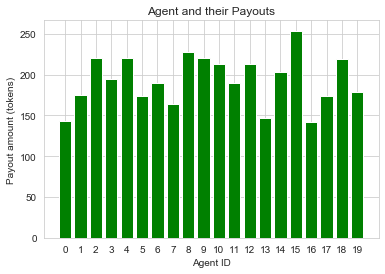

In [3]:
t = 600 # t is the last timestep

import matplotlib.pyplot as plt

S_free = experiments.dataset[0].supply_free[t]
S_0 = experiments.dataset[0].supply_0[t]
S_1 = experiments.dataset[0].supply_1[t]

agents_id = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
payout_list = []

for a in agents_id:
    #print(a)
    q1 = experiments.dataset[0].agents[t].agent_attestations_1[a]
    q0 = experiments.dataset[0].agents[t].agent_attestations_0[a]
    
    s_free = experiments.dataset[0].agents[t].agent_supply_free[a]
    s1 = experiments.dataset[0].agents[t].agent_supply_1[a]
    s0 = experiments.dataset[0].agents[t].agent_supply_0[a]
    s = s_free + s1 + s0
    
    agent_private_alpha = experiments.dataset[0].agents[t].agent_private_alpha[a]

    Q0 = experiments.dataset[0].attestations_0[t]
    Q1 = 1 #experiments.dataset[0].attestations_1[t]

    R = experiments.dataset[0].reserve[t]
    S = experiments.dataset[0].supply[t]

    C = 72000 # experiments.C
    alpha = experiments.dataset[0].alpha[t]
    
    # At the time of settlement, if alpha < 0.5, we consider it to be 0. If alpha > 0.5, we consider it to be 1. 
    # Thus Settlement Conditions apply
    if alpha < 0.5:
        alpha = 0
    elif alpha > 0.5:
        alpha = 1
    
    #print("s_free = ", s_free, "| S = ", S)
    T1 = (s_free/S)*(C*alpha + R)
    T2 = (s1/(S-S_0))*alpha*(C+R)
    T3 = (s0/(S-S_1))*(1-alpha)*(R)
    #print("T1 = ", T1, "| T2 = ", T2, "| T3 = ", T3)

    agent_payout = T1+T2+T3
    payout_list.append(agent_payout)
    #print(a, "'s Payout = ", agent_payout, "| Private Alpha = ", agent_private_alpha)

#plt.plot(payout_list)

arr2d = np.array(payout_list)

arr1d = arr2d.flatten()

x = agents_id
payouts = arr1d

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, payouts, color='green')
plt.xlabel("Agent ID")
plt.ylabel("Payout amount (tokens)")
plt.title("Agent and their Payouts")

plt.xticks(x_pos, x)

plt.show()

In [4]:
average_agent_payout = sum(payouts)/len(payouts)
print("Average Agent Payout = ", average_agent_payout)

Average Agent Payout =  192.98766694198562


### Test Case F: Continuous Funding Enabled. Burn on primary market Disabled. Private Alpha increasing.

ENABLE_CONTINUOUS = [True] <br>
ENABLE_BURN = [False] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


ALPHA =  0.03536977491961415
KAPPA =  1.0385852090032155
Initial Conditions (config.py) :  {'reserve': 66000, 'pbar': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 132000.0, 'alpha': 0.03536977491961415, 'alpha_bar': 0.03536977491961415, 'supply_0': 30000, 'supply_1': 100, 'supply_free': 101900.0, 'attestations': 30000, 'attestations_0': 30000, 'attestations_1': 100, 'invariant_V': 264000.0, 'invariant_I': 68546.62379421222, 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0    0                     0                     0            100   
1    1                     0                     0            100   
2    2                     0                     0            100   
3    3                     0                     0            100   
4    4                     0                     0            100   
5    5                     0                     0            100   
6    6                     0                     0          

Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.060959435841470413 private_alpha =  0.535
amt_pos =  89.24513152361358
amt_Q1 =  0.033711951356609315
PRICE (ATTEST):  0.5486709490853643
Positive attestation 1
S =  132380.3313599921
KAPPA  =  1.1001702824559514
R =  66019.9999998
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
17  17.0              0.033712                   0.0       0.000001   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
17       89.245132             0.0          98.521988                0.535   

    agent_private_price  agent_private_alpha_signal  \
17                0.535                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
17                         0.0                        0.0   

    agent_public_price_signal  
17                        0.0   Time  7
---------END OF TIMESTEP 7 -----------
      id  age

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.000000                   0.0     100.000000   
16  16.0              0.000000                   0.0     100.000000   
17  17.0              0.033712                   0.0       0.000001   
18  18.0              0.000000                   0.0     100.000000   
19  19.0              0.000000                   0.0     100.000000   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15        0.000000             0.0           0.000000                0.500   
16        0.000000             0.0           0.000000                0.505   
17       89.245132             0.0          98.521988                0.535   
18        0.000000             0.0           0.000000                0.500   
19        0.000000             0.0           0.000000                0.500   

    agent_private_price  agent_private_alpha_signal  \
15                0.500                         0

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
12  12.0              0.032603                   0.0       0.000001   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
12       86.749144             0.0          82.265571                0.595   

    agent_private_price  agent_private_alpha_signal  \
12                0.595                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
12                         0.0                        0.0   

    agent_public_price_signal  
12                        0.0   Time  19
---------END OF TIMESTEP 19 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.000000                   0.0     100.000000   
16  16.0              0.000000                   0.0     100.000000   
17  17.0              0.033712                   0.0      56.590035   
18  18.0              0.000000               

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.000000                   0.0     100.000000   
16  16.0              0.000000                   0.0     100.000000   
17  17.0              0.033712                   0.0      56.590035   
18  18.0              0.000000                   0.0     100.000000   
19  19.0              0.000000                   0.0     100.000000   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15        0.000000             0.0       0.000000e+00                0.500   
16        0.000000             0.0       0.000000e+00                0.505   
17       89.245132             0.0       5.698811e-07                0.565   
18        0.000000             0.0      -5.820766e-11                0.590   
19        0.000000             0.0       0.000000e+00                0.500   

    agent_private_price  agent_private_alpha_signal  \
15                0.500                         0

PRICE pbar (from bondburn update) = 0.6563840989155798
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.30216161040983597 private_alpha =  0.6599999999999999
amt_pos =  38.9484326263386
amt_Q1 =  0.014566786920310404
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.30216161040983597 private_alpha =  0.6599999999999999
amt_pos =  43.42076918011693
amt_Q1 =  0.01623931392933102
PRICE (ATTEST):  0.66048848087506
Positive attestation 1
S =  134208.79482754914
KAPPA  =  1.3404409952678207
R =  66129.99999899999
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037525                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      100.195689             0.0          58.696494                 0.66   

    agent_private_price  agent_private_a

Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.3540714238773401 private_alpha =  0.69
amt_pos =  32.71818675796421
amt_Q1 =  0.012200534882312692
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.3540714238773401 private_alpha =  0.69
amt_pos =  27.564576794186237
amt_Q1 =  0.010278864108168964
PRICE (ATTEST):  0.6834011851153396
Positive attestation 1
S =  134756.3800654606
KAPPA  =  1.3918283317824158
R =  66166.68718092005
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
2  2.0              0.040388                   0.0   1.000000e-14   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
2      107.515618             0.0          67.159654                 0.69   

   agent_private_price  agent_private_alpha_signal  \
2                 0.69                         0.0   

   agent_private_price_signal  agent_public

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
4  4.0              0.039101                   0.0   1.000000e-14   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
4      104.705752             0.0          46.668287                 0.72   

   agent_private_price  agent_private_alpha_signal  \
4                 0.72                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
4                         0.0                        0.0   

   agent_public_price_signal  
4                        0.0   Time  44
---------END OF TIMESTEP 44 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037525                   0.0   1.000000e-14   
16  16.0              0.033500                   0.0   1.000000e-14   
17  17.0              0.033712                   0.0   5.659003e+01   
18  18.0              0.000000                   0.0   1.

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037525                   0.0   1.000000e-14   
16  16.0              0.033500                   0.0   1.000000e-14   
17  17.0              0.033712                   0.0   5.659003e+01   
18  18.0              0.018308                   0.0   1.000000e-06   
19  19.0              0.018646                   0.0   1.000000e-06   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      100.195689             0.0       5.869649e+01                0.660   
16       89.756405             0.0       5.971044e+01                0.705   
17       89.245132             0.0       5.698811e-07                0.565   
18       49.154020             0.0       9.340372e+01                0.735   
19       49.865405             0.0       1.034017e+02                0.655   

    agent_private_price  agent_private_alpha_signal  \
15                0.660                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037525                   0.0   1.000000e-14   
16  16.0              0.033500                   0.0   1.000000e-14   
17  17.0              0.033712                   0.0   5.659003e+01   
18  18.0              0.018308                   0.0   1.000000e-06   
19  19.0              0.018646                   0.0   1.000000e-06   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      100.195689             0.0       5.869649e+01                0.660   
16       89.756405             0.0       5.971044e+01                0.705   
17       89.245132             0.0       5.698811e-07                0.565   
18       49.154020             0.0       9.340372e+01                0.735   
19       49.865405             0.0       1.034017e+02                0.655   

    agent_private_price  agent_private_alpha_signal  \
15                0.660                         0

CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.067045                   0.0   1.000000e-38   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1      178.119653             0.0          14.444589                 0.78   

   agent_private_price  agent_private_alpha_signal  \
1                 0.78                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
1                         0.0                        0.0   

   agent_public_price_signal  
1                        0.0   Time  59
agent['agent_private_price'] =  0.7999999999999999
agent['agent_private_alpha'] =  0.7999999999999999
r 1.0000000401430252e-38
Agent bonds. Amt to bond =  1.0000000301430247e-38
Positive attestation. | alpha =  0.435527399425861 private_alpha =  0.7999999999999999
amt_pos =  6.66230833838457
amt_Q1 =  0.002481953962540922
PRICE pbar (from bondburn update) = 3.4359739403706442e-28
r 1.00

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
6  6.0              0.050989                   0.0   1.000000e-30   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
6      136.608345             0.0          18.366146                 0.83   

   agent_private_price  agent_private_alpha_signal  \
6                 0.83                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
6                         0.0                        0.0   

   agent_public_price_signal  
6                        0.0   Time  66
---------END OF TIMESTEP 66 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037525                   0.0   1.000000e-14   
16  16.0              0.047642                   0.0   1.000000e-30   
17  17.0              0.033712                   0.0   5.659003e+01   
18  18.0              0.018308                   0.0   1.

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037525                   0.0   1.000000e-14   
16  16.0              0.047642                   0.0   1.000000e-30   
17  17.0              0.033712                   0.0   5.659003e+01   
18  18.0              0.018308                   0.0   1.000000e-06   
19  19.0              0.037235                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      100.195689             0.0       5.869649e+01                0.660   
16      127.722842             0.0       2.174401e+01                0.805   
17       89.245132             0.0       5.698811e-07                0.565   
18       49.154020             0.0       9.340372e+01                0.735   
19       99.782249             0.0       5.348487e+01                0.845   

    agent_private_price  agent_private_alpha_signal  \
15                0.660                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037525                   0.0   1.000000e-14   
16  16.0              0.047642                   0.0   1.000000e-30   
17  17.0              0.033712                   0.0   5.659003e+01   
18  18.0              0.033528                   0.0   1.000000e-14   
19  19.0              0.037235                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      100.195689             0.0       5.869649e+01                0.660   
16      127.722842             0.0       2.174401e+01                0.805   
17       89.245132             0.0       5.698811e-07                0.565   
18       89.997844             0.0       5.255989e+01                0.880   
19       99.782249             0.0       5.348487e+01                0.845   

    agent_private_price  agent_private_alpha_signal  \
15                0.660                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037525                   0.0   1.000000e-14   
16  16.0              0.047642                   0.0   1.000000e-30   
17  17.0              0.033712                   0.0   5.659003e+01   
18  18.0              0.046972                   0.0   1.000000e-30   
19  19.0              0.037235                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      100.195689             0.0       5.869649e+01                0.660   
16      127.722842             0.0       2.174401e+01                0.805   
17       89.245132             0.0       5.698811e-07                0.565   
18      126.063058             0.0       1.649468e+01                0.910   
19       99.782249             0.0       5.348487e+01                0.845   

    agent_private_price  agent_private_alpha_signal  \
15                0.660                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037525                   0.0   1.000000e-14   
16  16.0              0.047642                   0.0   1.000000e-30   
17  17.0              0.033712                   0.0   5.659003e+01   
18  18.0              0.049934                   0.0   1.000000e-38   
19  19.0              0.037235                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      100.195689             0.0       5.869649e+01                0.660   
16      127.722842             0.0       2.174401e+01                0.805   
17       89.245132             0.0       5.698811e-07                0.565   
18      134.008228             0.0       8.549512e+00                0.935   
19       99.782249             0.0       5.348487e+01                0.845   

    agent_private_price  agent_private_alpha_signal  \
15                0.660                         0

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
4  4.0               0.05594                   0.0   1.000000e-62   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
4      149.898796             0.0           1.475243                 0.97   

   agent_private_price  agent_private_alpha_signal  \
4                 0.97                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
4                         0.0                        0.0   

   agent_public_price_signal  
4                        0.0   Time  94
---------END OF TIMESTEP 94 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.037525                   0.0   1.000000e-14   
16  16.0              0.051699                   0.0   1.000000e-38   
17  17.0              0.033712                   0.0   5.659003e+01   
18  18.0              0.051469                   0.0   1.

Agent bonds. Amt to bond =  1.0000000301430247e-38
Positive attestation. | alpha =  0.5083465508210919 private_alpha =  1.0
amt_pos =  9.696154288259564
amt_Q1 =  0.0036176372808967546
PRICE (ATTEST):  0.7604717483093681
Positive attestation 1
S =  135320.44686286984
KAPPA  =  1.5543350858993108
R =  66206.68718178693
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
5  5.0               0.05499                   0.0   1.000000e-38   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
5      147.059672             0.0          10.161262                  1.0   

   agent_private_price  agent_private_alpha_signal  \
5                  1.0                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
5                         0.0                        0.0   

   agent_public_price_signal  
5                        0.0   Time  100
---------END OF TIMESTEP 100 -----------
Total execution tim

In [2]:
experiments = run.run()

config_ids =  [{'M': {'starting_kappa': 2, 'starting_alpha': 0.03536977491961415, 'money_raised': 66000, 'monthly_instalment': 3000, 'C': 72000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 1200, 'rules_price': 'martin', 'E': 0.2, 'ENABLE_CONTINUOUS': True, 'THETA': 0.9, 'ENABLE_BURN': False, 'fee_numerator': 997, 'fee_denominator': 1000}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}]


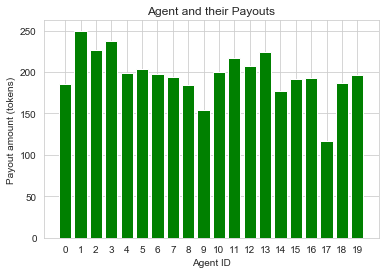

In [3]:
t = 600 # t is the last timestep

import matplotlib.pyplot as plt

S_free = experiments.dataset[0].supply_free[t]
S_0 = experiments.dataset[0].supply_0[t]
S_1 = experiments.dataset[0].supply_1[t]

agents_id = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
payout_list = []

for a in agents_id:
    #print(a)
    q1 = experiments.dataset[0].agents[t].agent_attestations_1[a]
    q0 = experiments.dataset[0].agents[t].agent_attestations_0[a]
    
    s_free = experiments.dataset[0].agents[t].agent_supply_free[a]
    s1 = experiments.dataset[0].agents[t].agent_supply_1[a]
    s0 = experiments.dataset[0].agents[t].agent_supply_0[a]
    s = s_free + s1 + s0
    
    agent_private_alpha = experiments.dataset[0].agents[t].agent_private_alpha[a]

    Q0 = experiments.dataset[0].attestations_0[t]
    Q1 = 1 #experiments.dataset[0].attestations_1[t]

    R = experiments.dataset[0].reserve[t]
    S = experiments.dataset[0].supply[t]

    C = 72000 # experiments.C
    alpha = experiments.dataset[0].alpha[t]
    
    # At the time of settlement, if alpha < 0.5, we consider it to be 0. If alpha > 0.5, we consider it to be 1. 
    # Thus Settlement Conditions apply
    if alpha < 0.5:
        alpha = 0
    elif alpha > 0.5:
        alpha = 1
    
    #print("s_free = ", s_free, "| S = ", S)
    T1 = (s_free/S)*(C*alpha + R)
    T2 = (s1/(S-S_0))*alpha*(C+R)
    T3 = (s0/(S-S_1))*(1-alpha)*(R)
    #print("T1 = ", T1, "| T2 = ", T2, "| T3 = ", T3)

    agent_payout = T1+T2+T3
    payout_list.append(agent_payout)
    #print(a, "'s Payout = ", agent_payout, "| Private Alpha = ", agent_private_alpha)

#plt.plot(payout_list)

arr2d = np.array(payout_list)

arr1d = arr2d.flatten()

x = agents_id
payouts = arr1d

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, payouts, color='green')
plt.xlabel("Agent ID")
plt.ylabel("Payout amount (tokens)")
plt.title("Agent and their Payouts")

plt.xticks(x_pos, x)

plt.show()

In [4]:
average_agent_payout = sum(payouts)/len(payouts)
print("Average Agent Payout = ", average_agent_payout)

Average Agent Payout =  197.13412354541


### Test Case G: Continuous Funding Disabled. Burn on primary market Enabled. Private Alpha increasing.

ENABLE_CONTINUOUS = [False] <br>
ENABLE_BURN = [True] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


ALPHA =  0.03536977491961415
KAPPA =  1.0385852090032155
Initial Conditions (config.py) :  {'reserve': 66000, 'pbar': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 132000.0, 'alpha': 0.03536977491961415, 'alpha_bar': 0.03536977491961415, 'supply_0': 30000, 'supply_1': 100, 'supply_free': 101900.0, 'attestations': 30000, 'attestations_0': 30000, 'attestations_1': 100, 'invariant_V': 264000.0, 'invariant_I': 68546.62379421222, 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0    0                     0                     0            100   
1    1                     0                     0            100   
2    2                     0                     0            100   
3    3                     0                     0            100   
4    4                     0                     0            100   
5    5                     0                     0            100   
6    6                     0                     0          

agent['agent_private_price'] =  0.535
agent['agent_private_alpha'] =  0.535
r 100.0
No trade. P =  0.5357273377874673 private_price =  0.535
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 0.519307212871992
r 100.0
No trade. P =  0.5357273377874673 private_price =  0.535
Agent supply too low. Cannot attest
r 100.0
No trade. P =  0.5357273377874673 private_price =  0.535
Agent supply too low. Cannot attest
PRICE (ATTEST):  0.5357273377874675
S =  132192.5642404365
KAPPA  =  1.0713944102405326
R =  66099.999999
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
3  3.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
3             0.0             0.0      -5.820766e-11                0.535   

   agent_private_price  agent_private_alpha_signal  \
3                0.535                         0.0   

   agent_private_price_signal  age

15                        0.0   Time  12
agent['agent_private_price'] =  0.565
agent['agent_private_alpha'] =  0.565
r 100.0
No trade. P =  0.5713171009107115 private_price =  0.565
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 0.5547236362777836
r 100.0
Agent burns. Amt to burn =  5.2386894298251715e-11
Positive attestation. | alpha =  0.1310208577178671 private_alpha =  0.565
amt_pos =  2.8268585820115718e-11
amt_Q1 =  0.0
r 100.0
Agent burns. Amt to burn =  5.2386894298251715e-11
Positive attestation. | alpha =  0.1310208577178671 private_alpha =  0.565
amt_pos =  2.7762254072837804e-11
amt_Q1 =  0.0
PRICE (ATTEST):  0.5713171009107112
Positive attestation 1
S =  132559.48689784188
KAPPA  =  1.142285094360683
R =  66299.999997
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_privat

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15    2.776225e-11             0.0       3.044541e-11                0.565   
16    0.000000e+00             0.0       0.000000e+00                0.500   
17    0.000000e+00             0.0       0.000000e+00                0.500   
18    0.000000e+00             0.0       0.000000e+00                0.500   
19    0.000000e+00             0.0       0.000000e+00                0.500   

    agent_private_price  agent_private_alpha_signal  \
15                0.565                         0

18                        0.0   Time  24
agent['agent_private_price'] =  0.625
agent['agent_private_alpha'] =  0.625
r 100.0
Agent bonds. Amt to bond =  99.99999899999999
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 0.6204014384318012
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.2213610405430269 private_alpha =  0.625
amt_pos =  56.550361294138696
amt_Q1 =  0.021279852637934173
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.2213610405430269 private_alpha =  0.625
amt_pos =  79.48037173092352
amt_Q1 =  0.02990710892874063
PRICE (ATTEST):  0.6360141748220163
Positive attestation 1
S =  133158.21838518168
KAPPA  =  1.2704544923228107
R =  66661.58835188099
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
18  18.0              0.029907                   0.0       0.000001   

    agent_supp

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0               0.05158                   0.0   1.000000e-14   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1      136.831338             0.0          43.438608                0.655   

   agent_private_price  agent_private_alpha_signal  \
1                0.655                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
1                         0.0                        0.0   

   agent_public_price_signal  
1                        0.0   Time  31
---------END OF TIMESTEP 31 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.027480                   0.0       0.000001   
16  16.0              0.021408                   0.0       0.000001   
17  17.0              0.000000                   0.0     100.000000   
18  18.0              0.029907                   0.0     

r 100.0
Agent bonds. Amt to bond =  99.99999899999999
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 0.6847766137709995
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.33836398277956176 private_alpha =  0.69
amt_pos =  60.778457342108084
amt_Q1 =  0.0227954832585743
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.33836398277956176 private_alpha =  0.69
amt_pos =  60.463542023883804
amt_Q1 =  0.022677384896269234
PRICE (ATTEST):  0.6958299789328845
Positive attestation 1
S =  133822.158924785
KAPPA  =  1.387741729273409
R =  67099.9999936159
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
2  2.0              0.022677                   0.0       0.000001   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
2       60.463542             0.0          85.569481          

8                        0.0   Time  44
---------END OF TIMESTEP 44 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.041678                   0.0   1.000000e-14   
16  16.0              0.021408                   0.0   1.000000e-06   
17  17.0              0.000000                   0.0   1.000000e+02   
18  18.0              0.029907                   0.0   1.000000e-06   
19  19.0              0.000000                   0.0   1.000000e+02   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      110.643441             0.0          56.138065                0.665   
16       56.834995             0.0         106.857614                0.615   
17        0.000000             0.0           0.000000                0.500   
18       79.480372             0.0          81.705584                0.625   
19        0.000000             0.0           0.000000                0.500   

    agent_private_price 

amt_pos =  7.63530228173652
amt_Q1 =  0.0028591977598445882
PRICE pbar (from bondburn update) = -3.4359739345050324e-20
r 1.0000000401430252e-38
Agent bonds. Amt to bond =  1.0000000301430247e-38
Positive attestation. | alpha =  0.42021615197094114 private_alpha =  0.7549999999999999
amt_pos =  6.623059422807836
amt_Q1 =  0.0024801470418172114
r 1.0000000401430252e-38
Agent bonds. Amt to bond =  1.0000000301430247e-38
Positive attestation. | alpha =  0.42021615197094114 private_alpha =  0.7549999999999999
amt_pos =  9.22090597597804
amt_Q1 =  0.0034529498475381107
PRICE (ATTEST):  0.7285950709912057
Positive attestation 1
S =  134218.7812872553
KAPPA  =  1.4513685288610993
R =  67378.57445281549
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
5  5.0              0.051202                   0.0   1.000000e-38   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
5      136.596025             0.0          12.537939   

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.041678                   0.0   1.000000e-14   
16  16.0              0.021408                   0.0   1.000000e-06   
17  17.0              0.000000                   0.0   1.000000e+02   
18  18.0              0.029907                   0.0   1.000000e-06   
19  19.0              0.029170                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      110.643441             0.0          56.138065                0.665   
16       56.834995             0.0         106.857614                0.615   
17        0.000000             0.0           0.000000                0.500   
18       79.480372             0.0          81.705584                0.625   
19       77.964743             0.0          58.638708                0.770   

    agent_private_price  agent_private_alpha_signal  \
15                0.665                         0

agent['agent_private_price'] =  0.82
agent['agent_private_alpha'] =  0.82
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.4828853082195971 private_alpha =  0.82
amt_pos =  36.37719207641794
amt_Q1 =  0.013611474466635607
PRICE pbar (from bondburn update) = 0.7611647598842263
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.4828853082195971 private_alpha =  0.82
amt_pos =  30.350345285704233
amt_Q1 =  0.01135649987590971
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.4828853082195971 private_alpha =  0.82
amt_pos =  38.55751715141225
amt_Q1 =  0.014427241454654856
PRICE (ATTEST):  0.7652462130412966
Positive attestation 1
S =  134488.1099938474
KAPPA  =  1.5229163636643803
R =  67578.57445581547
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
16  16.0    

2                        0.0   Time  68
---------END OF TIMESTEP 68 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.041678                   0.0   1.000000e-14   
16  16.0              0.035836                   0.0   1.000000e-14   
17  17.0              0.000000                   0.0   1.000000e+02   
18  18.0              0.029907                   0.0   1.000000e-06   
19  19.0              0.038363                   0.0   1.000000e-22   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      110.643441             0.0          56.138065                0.665   
16       95.392512             0.0          68.300098                0.820   
17        0.000000             0.0           0.000000                0.500   
18       79.480372             0.0          81.705584                0.625   
19      102.518036             0.0          34.085415                0.800   

    agent_private_price 

13                        0.0   Time  74
agent['agent_private_price'] =  0.875
agent['agent_private_alpha'] =  0.875
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.5200446406922816 private_alpha =  0.875
amt_pos =  28.799210534790138
amt_Q1 =  0.010775436447382512
PRICE pbar (from bondburn update) = 0.7817203991885575
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.5200446406922816 private_alpha =  0.875
amt_pos =  25.23266199497371
amt_Q1 =  0.009441048600987751
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.5200446406922816 private_alpha =  0.875
amt_pos =  29.371953388522776
amt_Q1 =  0.010989720711410326
PRICE (ATTEST):  0.7838129584762865
Positive attestation 1
S =  134618.06537121546
KAPPA  =  1.5590662913376674
R =  67678.57445781546
UPDATED CHOSEN AGENT =        id  agent_attestations_1  ag

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
4  4.0              0.045217                   0.0   1.000000e-38   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
4      120.910664             0.0           9.044711                0.905   

   agent_private_price  agent_private_alpha_signal  \
4                0.905                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
4                         0.0                        0.0   

   agent_public_price_signal  
4                        0.0   Time  81
---------END OF TIMESTEP 81 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.041678                   0.0   1.000000e-14   
16  16.0              0.043595                   0.0   1.000000e-22   
17  17.0              0.017982                   0.0   1.000000e-06   
18  18.0              0.029907                   0.0   1.

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.041678                   0.0   1.000000e-14   
16  16.0              0.051886                   0.0   1.000000e-30   
17  17.0              0.017982                   0.0   1.000000e-06   
18  18.0              0.029907                   0.0   1.000000e-06   
19  19.0              0.044334                   0.0   1.000000e-30   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      110.643441             0.0          56.138065                0.665   
16      138.301530             0.0          25.391080                0.915   
17       48.102977             0.0          79.444703                0.880   
18       79.480372             0.0          81.705584                0.625   
19      118.479589             0.0          18.123862                0.930   

    agent_private_price  agent_private_alpha_signal  \
15                0.665                         0

agent['agent_private_alpha'] =  0.97
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.5683107350962628 private_alpha =  0.97
amt_pos =  30.75363269870269
amt_Q1 =  0.01149882022579323
PRICE pbar (from bondburn update) = 0.807229846726979
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.5683107350962628 private_alpha =  0.97
amt_pos =  32.46627107060578
amt_Q1 =  0.012139139241156092
r 1.0000000248033174e-14
Agent bonds. Amt to bond =  1.0000000148033171e-14
Positive attestation. | alpha =  0.5683107350962628 private_alpha =  0.97
amt_pos =  35.39922701998401
amt_Q1 =  0.013235699570979512
PRICE (ATTEST):  0.8097587593487274
Positive attestation 1
S =  134871.0300593651
KAPPA  =  1.6089465467609234
R =  67878.57445781546
UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
17  17.0              0.031218                   0.

r 2.1425540452923997e-07
Agent bonds. Amt to bond =  2.142554023866859e-07
Positive attestation. | alpha =  0.5879253835621149 private_alpha =  1.0
amt_pos =  9.157422642816893
amt_Q1 =  0.0034220116541249447
PRICE (ATTEST):  0.8190841502137195
Positive attestation 1
S =  135020.70441655477
KAPPA  =  1.6263723373807757
R =  67999.99999778577
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.063008                   0.0   2.142554e-07   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0      166.954492             0.0           17.05777                  1.0   

   agent_private_price  agent_private_alpha_signal  \
0                  1.0                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
0                         0.0                        0.0   

   agent_public_price_signal  
0                        0.0   Time  100
---------END OF TIMESTEP 100 -------

In [2]:
experiments = run.run()

config_ids =  [{'M': {'starting_kappa': 2, 'starting_alpha': 0.03536977491961415, 'money_raised': 66000, 'monthly_instalment': 3000, 'C': 72000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 1200, 'rules_price': 'martin', 'E': 0.2, 'ENABLE_CONTINUOUS': False, 'THETA': 0.9, 'ENABLE_BURN': True, 'fee_numerator': 997, 'fee_denominator': 1000}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}]


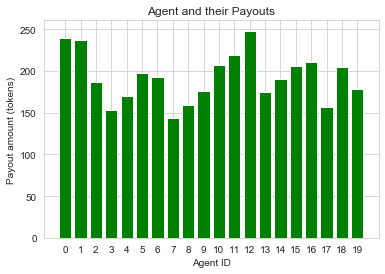

In [3]:
t = 600 # t is the last timestep

import matplotlib.pyplot as plt

S_free = experiments.dataset[0].supply_free[t]
S_0 = experiments.dataset[0].supply_0[t]
S_1 = experiments.dataset[0].supply_1[t]

agents_id = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
payout_list = []

for a in agents_id:
    #print(a)
    q1 = experiments.dataset[0].agents[t].agent_attestations_1[a]
    q0 = experiments.dataset[0].agents[t].agent_attestations_0[a]
    
    s_free = experiments.dataset[0].agents[t].agent_supply_free[a]
    s1 = experiments.dataset[0].agents[t].agent_supply_1[a]
    s0 = experiments.dataset[0].agents[t].agent_supply_0[a]
    s = s_free + s1 + s0
    
    agent_private_alpha = experiments.dataset[0].agents[t].agent_private_alpha[a]

    Q0 = experiments.dataset[0].attestations_0[t]
    Q1 = 1 #experiments.dataset[0].attestations_1[t]

    R = experiments.dataset[0].reserve[t]
    S = experiments.dataset[0].supply[t]

    C = 72000 # experiments.C
    alpha = experiments.dataset[0].alpha[t]
    
    # At the time of settlement, if alpha < 0.5, we consider it to be 0. If alpha > 0.5, we consider it to be 1. 
    # Thus Settlement Conditions apply
    if alpha < 0.5:
        alpha = 0
    elif alpha > 0.5:
        alpha = 1
    
    #print("s_free = ", s_free, "| S = ", S)
    T1 = (s_free/S)*(C*alpha + R)
    T2 = (s1/(S-S_0))*alpha*(C+R)
    T3 = (s0/(S-S_1))*(1-alpha)*(R)
    #print("T1 = ", T1, "| T2 = ", T2, "| T3 = ", T3)

    agent_payout = T1+T2+T3
    payout_list.append(agent_payout)
    #print(a, "'s Payout = ", agent_payout, "| Private Alpha = ", agent_private_alpha)

#plt.plot(payout_list)

arr2d = np.array(payout_list)

arr1d = arr2d.flatten()

x = agents_id
payouts = arr1d

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, payouts, color='green')
plt.xlabel("Agent ID")
plt.ylabel("Payout amount (tokens)")
plt.title("Agent and their Payouts")

plt.xticks(x_pos, x)

plt.show()

In [4]:
average_agent_payout = sum(payouts)/len(payouts)
print("Average Agent Payout = ", average_agent_payout)

Average Agent Payout =  192.7587465139634


### Test Case H: Continuous Funding Enabled. Burn on primary market Enabled. Private Alpha increasing.

ENABLE_CONTINUOUS = [True] <br>
ENABLE_BURN = [True] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


ALPHA =  0.03536977491961415
KAPPA =  1.0385852090032155
Initial Conditions (config.py) :  {'reserve': 66000, 'pbar': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 132000.0, 'alpha': 0.03536977491961415, 'alpha_bar': 0.03536977491961415, 'supply_0': 30000, 'supply_1': 100, 'supply_free': 101900.0, 'attestations': 30000, 'attestations_0': 30000, 'attestations_1': 100, 'invariant_V': 264000.0, 'invariant_I': 68546.62379421222, 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0    0                     0                     0            100   
1    1                     0                     0            100   
2    2                     0                     0            100   
3    3                     0                     0            100   
4    4                     0                     0            100   
5    5                     0                     0            100   
6    6                     0                     0          

PRICE (ATTEST):  0.5375884502356296
S =  132192.56424043648
KAPPA  =  1.0765822715164037
R =  66009.9999999
UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
3  3.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
3             0.0             0.0      -8.731149e-11                0.525   

   agent_private_price  agent_private_alpha_signal  \
3                0.525                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
3                         0.0                        0.0   

   agent_public_price_signal  
3                        0.0   Time  5
---------END OF TIMESTEP 5 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0              

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0                   0.0                   0.0          100.0   
16  16.0                   0.0                   0.0          100.0   
17  17.0                   0.0                   0.0          100.0   
18  18.0                   0.0                   0.0          100.0   
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15             0.0             0.0      -2.910383e-11                0.530   
16             0.0             0.0       0.000000e+00                0.500   
17             0.0             0.0       0.000000e+00                0.500   
18             0.0             0.0       0.000000e+00                0.500   
19             0.0             0.0      -2.910383e-11                0.535   

    agent_private_price  agent_private_alpha_signal  \
15                0.530                         0

CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
19  19.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
19             0.0             0.0      -2.910383e-11                0.535   

    agent_private_price  agent_private_alpha_signal  \
19                0.535                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
19                         0.0                        0.0   

    agent_public_price_signal  
19                        0.0   Time  10
agent['agent_private_price'] =  0.555
agent['agent_private_alpha'] =  0.555
r 100.0
Agent bonds. Amt to bond =  99.99999899999999
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 0.5513992121615836
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.09678006242843341 private_alpha =  0.555
amt_

UPDATED CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
5  5.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
5             0.0             0.0      -2.910383e-11                 0.57   

   agent_private_price  agent_private_alpha_signal  \
5                 0.57                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
5                         0.0                        0.0   

   agent_public_price_signal  
5                        0.0   Time  14
---------END OF TIMESTEP 14 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.000000                   0.0     100.000000   
16  16.0              0.000000                   0.0     100.000000   
17  17.0              0.000000                   0.0     100.000000   
18  18.0              0.033103                   0.0     

CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
16  16.0                   0.0                   0.0          100.0   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
16             0.0             0.0                0.0                  0.5   

    agent_private_price  agent_private_alpha_signal  \
16                  0.5                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
16                         0.0                        0.0   

    agent_public_price_signal  
16                        0.0   Time  16
agent['agent_private_price'] =  0.585
agent['agent_private_alpha'] =  0.585
r 100.0
No trade. P =  0.5896735268859764 private_price =  0.585
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 0.575490732492428
r 100.0
Agent burns. Amt to burn =  2.6193447149125858e-11
Positive attestation. | alpha =  0.1670684026308713 private_alpha =  0.585
amt_pos =  1

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.000000                   0.0   1.000000e+02   
16  16.0              0.000000                   0.0   1.000000e+02   
17  17.0              0.048106                   0.0   1.000000e-14   
18  18.0              0.033103                   0.0   1.000000e-06   
19  19.0              0.030632                   0.0   1.000000e-06   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15    0.000000e+00             0.0      -2.910383e-11                0.530   
16    1.380880e-11             0.0       1.529503e-11                0.585   
17    1.276104e+02             0.0       4.615437e+01                0.590   
18    8.780366e+01             0.0       8.958845e+01                0.565   
19    8.116628e+01             0.0       1.001905e+02                0.555   

    agent_private_price  agent_private_alpha_signal  \
15                0.530                         0

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
17  17.0              0.058323                   0.0   1.000000e-30   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
17      154.738053             0.0          19.026692                0.615   

    agent_private_price  agent_private_alpha_signal  \
17                0.615                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
17                         0.0                        0.0   

    agent_public_price_signal  
17                        0.0   Time  23
---------END OF TIMESTEP 23 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.000000                   0.0   1.000000e+02   
16  16.0              0.000000                   0.0   1.000000e+02   
17  17.0              0.058323                   0.0   1.000000e-30   
18  18.0              0.033103               

CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.029764                   0.0       0.000001   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       79.160483             0.0          82.388945                0.625   

   agent_private_price  agent_private_alpha_signal  \
1                0.625                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
1                         0.0                        0.0   

   agent_public_price_signal  
1                        0.0   Time  25
agent['agent_private_price'] =  0.6299999999999999
agent['agent_private_alpha'] =  0.6299999999999999
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.24258929736255314 private_alpha =  0.6299999999999999
amt_pos =  33.37048523889528
amt_Q1 =  0.01255202604562162
PRICE pbar (from bondburn update) = 0.6286314615597691
r 1.0000

CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
6  6.0                   0.0                   0.0          100.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
6             0.0             0.0                0.0                  0.5   

   agent_private_price  agent_private_alpha_signal  \
6                  0.5                         0.0   

   agent_private_price_signal  agent_public_alpha_signal  \
6                         0.0                        0.0   

   agent_public_price_signal  
6                        0.0   Time  28
agent['agent_private_price'] =  0.645
agent['agent_private_alpha'] =  0.645
r 100.0
Agent bonds. Amt to bond =  99.99999899999999
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 0.6437027103453623
r 1.0000000116860974e-06
Agent bonds. Amt to bond =  1.0000000016860972e-06
Positive attestation. | alpha =  0.27166594356253887 private_alpha =  0.645
amt_pos =  66.16

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.000000                   0.0   1.000000e+02   
16  16.0              0.022072                   0.0   1.000000e-06   
17  17.0              0.058323                   0.0   1.000000e-30   
18  18.0              0.056975                   0.0   1.000000e-22   
19  19.0              0.043216                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15        0.000000             0.0      -2.910383e-11                0.530   
16       58.837987             0.0       9.468887e+01                0.655   
17      154.738053             0.0       1.902669e+01                0.615   
18      151.280238             0.0       2.611188e+01                0.660   
19      114.675684             0.0       6.668112e+01                0.650   

    agent_private_price  agent_private_alpha_signal  \
15                0.530                         0

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
12  12.0              0.024956                   0.0       0.000001   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
12       66.691798             0.0          82.062359                 0.68   

    agent_private_price  agent_private_alpha_signal  \
12                 0.68                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
12                         0.0                        0.0   

    agent_public_price_signal  
12                        0.0   Time  36
---------END OF TIMESTEP 36 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.026014                   0.0   1.000000e-06   
16  16.0              0.033234                   0.0   1.000000e-14   
17  17.0              0.058323                   0.0   1.000000e-30   
18  18.0              0.056975               

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.026014                   0.0   1.000000e-06   
16  16.0              0.033234                   0.0   1.000000e-14   
17  17.0              0.058323                   0.0   1.000000e-30   
18  18.0              0.056975                   0.0   1.000000e-22   
19  19.0              0.043216                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15       69.404098             0.0          82.569077                0.665   
16       88.634945             0.0          64.891915                0.675   
17      154.738053             0.0          19.026692                0.615   
18      151.280238             0.0          26.111878                0.660   
19      114.675684             0.0          66.681122                0.650   

    agent_private_price  agent_private_alpha_signal  \
15                0.665                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.026014                   0.0   1.000000e-06   
16  16.0              0.033234                   0.0   1.000000e-14   
17  17.0              0.058323                   0.0   1.000000e-30   
18  18.0              0.056975                   0.0   1.000000e-22   
19  19.0              0.043216                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15       69.404098             0.0          82.569077                0.665   
16       88.634945             0.0          64.891915                0.675   
17      154.738053             0.0          19.026692                0.615   
18      151.280238             0.0          26.111878                0.660   
19      114.675684             0.0          66.681122                0.650   

    agent_private_price  agent_private_alpha_signal  \
15                0.665                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.038703                   0.0   1.000000e-14   
16  16.0              0.033234                   0.0   1.000000e-14   
17  17.0              0.061217                   0.0   1.000000e-38   
18  18.0              0.056975                   0.0   1.000000e-22   
19  19.0              0.043216                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      103.287193             0.0          48.685983                0.710   
16       88.634945             0.0          64.891915                0.675   
17      162.476390             0.0          11.288354                0.730   
18      151.280238             0.0          26.111878                0.660   
19      114.675684             0.0          66.681122                0.650   

    agent_private_price  agent_private_alpha_signal  \
15                0.710                         0

UPDATED CHOSEN AGENT =        id  agent_attestations_1  agent_attestations_0  agent_reserve  \
11  11.0              0.016589                   0.0       0.000001   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
11        44.40675             0.0          97.874955                0.745   

    agent_private_price  agent_private_alpha_signal  \
11                0.745                         0.0   

    agent_private_price_signal  agent_public_alpha_signal  \
11                         0.0                        0.0   

    agent_public_price_signal  
11                        0.0   Time  49
---------END OF TIMESTEP 49 -----------
      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.038703                   0.0   1.000000e-14   
16  16.0              0.041039                   0.0   1.000000e-22   
17  17.0              0.061217                   0.0   1.000000e-38   
18  18.0              0.056975               

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.045892                   0.0   1.000000e-22   
16  16.0              0.048219                   0.0   1.000000e-30   
17  17.0              0.061217                   0.0   1.000000e-38   
18  18.0              0.056975                   0.0   1.000000e-22   
19  19.0              0.043216                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      122.526979             0.0          29.446197                0.750   
16      128.719082             0.0          24.807778                0.755   
17      162.476390             0.0          11.288354                0.730   
18      151.280238             0.0          26.111878                0.660   
19      114.675684             0.0          66.681122                0.650   

    agent_private_price  agent_private_alpha_signal  \
15                0.750                         0

      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
15  15.0              0.049667                   0.0   1.000000e-30   
16  16.0              0.048219                   0.0   1.000000e-30   
17  17.0              0.061217                   0.0   1.000000e-38   
18  18.0              0.059981                   0.0   1.000000e-30   
19  19.0              0.043216                   0.0   1.000000e-14   

    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
15      132.633655             0.0          19.339521                0.780   
16      128.719082             0.0          24.807778                0.755   
17      162.476390             0.0          11.288354                0.730   
18      159.323482             0.0          18.068634                0.770   
19      114.675684             0.0          66.681122                0.650   

    agent_private_price  agent_private_alpha_signal  \
15                0.780                         0

In [1]:
experiments = run.run()

NameError: name 'run' is not defined

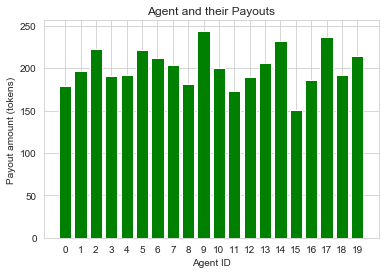

In [3]:
t = 600 # t is the last timestep

import matplotlib.pyplot as plt

S_free = experiments.dataset[0].supply_free[t]
S_0 = experiments.dataset[0].supply_0[t]
S_1 = experiments.dataset[0].supply_1[t]

agents_id = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
payout_list = []

for a in agents_id:
    #print(a)
    q1 = experiments.dataset[0].agents[t].agent_attestations_1[a]
    q0 = experiments.dataset[0].agents[t].agent_attestations_0[a]
    
    s_free = experiments.dataset[0].agents[t].agent_supply_free[a]
    s1 = experiments.dataset[0].agents[t].agent_supply_1[a]
    s0 = experiments.dataset[0].agents[t].agent_supply_0[a]
    s = s_free + s1 + s0
    
    agent_private_alpha = experiments.dataset[0].agents[t].agent_private_alpha[a]

    Q0 = experiments.dataset[0].attestations_0[t]
    Q1 = 1 #experiments.dataset[0].attestations_1[t]

    R = experiments.dataset[0].reserve[t]
    S = experiments.dataset[0].supply[t]

    C = 72000 # experiments.C
    alpha = experiments.dataset[0].alpha[t]
    
    # At the time of settlement, if alpha < 0.5, we consider it to be 0. If alpha > 0.5, we consider it to be 1. 
    # Thus Settlement Conditions apply
    if alpha < 0.5:
        alpha = 0
    elif alpha > 0.5:
        alpha = 1
    
    #print("s_free = ", s_free, "| S = ", S)
    T1 = (s_free/S)*(C*alpha + R)
    T2 = (s1/(S-S_0))*alpha*(C+R)
    T3 = (s0/(S-S_1))*(1-alpha)*(R)
    #print("T1 = ", T1, "| T2 = ", T2, "| T3 = ", T3)

    agent_payout = T1+T2+T3
    payout_list.append(agent_payout)
    #print(a, "'s Payout = ", agent_payout, "| Private Alpha = ", agent_private_alpha)

#plt.plot(payout_list)

arr2d = np.array(payout_list)

arr1d = arr2d.flatten()

x = agents_id
payouts = arr1d

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, payouts, color='green')
plt.xlabel("Agent ID")
plt.ylabel("Payout amount (tokens)")
plt.title("Agent and their Payouts")

plt.xticks(x_pos, x)

plt.show()

In [4]:
average_agent_payout = sum(payouts)/len(payouts)
print("Average Agent Payout = ", average_agent_payout)

Average Agent Payout =  201.21926465493837
